<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Predictive-Analytics-for-Finance" data-toc-modified-id="Predictive-Analytics-for-Finance-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Predictive Analytics for Finance</a></span><ul class="toc-item"><li><span><a href="#Structured-Data" data-toc-modified-id="Structured-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Structured Data</a></span></li><li><span><a href="#Unstructured-Data---NLP" data-toc-modified-id="Unstructured-Data---NLP-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Unstructured Data - NLP</a></span><ul class="toc-item"><li><span><a href="#POS-Tagging" data-toc-modified-id="POS-Tagging-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>POS Tagging</a></span></li><li><span><a href="#Cohesion-(Character-N-gram)" data-toc-modified-id="Cohesion-(Character-N-gram)-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Cohesion (Character N-gram)</a></span></li><li><span><a href="#Tokenizer" data-toc-modified-id="Tokenizer-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Tokenizer</a></span><ul class="toc-item"><li><span><a href="#POS-Tagging" data-toc-modified-id="POS-Tagging-1.2.3.1"><span class="toc-item-num">1.2.3.1&nbsp;&nbsp;</span>POS Tagging</a></span></li></ul></li></ul></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Load Data</a></span><ul class="toc-item"><li><span><a href="#Pre-Defined-Tokenization" data-toc-modified-id="Pre-Defined-Tokenization-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Pre-Defined Tokenization</a></span></li><li><span><a href="#Data-Driven-Tokenization" data-toc-modified-id="Data-Driven-Tokenization-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Data-Driven Tokenization</a></span><ul class="toc-item"><li><span><a href="#L-Tokenizer" data-toc-modified-id="L-Tokenizer-1.3.2.1"><span class="toc-item-num">1.3.2.1&nbsp;&nbsp;</span>L-Tokenizer</a></span></li><li><span><a href="#Max-Score-Tokenizer" data-toc-modified-id="Max-Score-Tokenizer-1.3.2.2"><span class="toc-item-num">1.3.2.2&nbsp;&nbsp;</span>Max Score Tokenizer</a></span></li></ul></li><li><span><a href="#Noun-Extraction" data-toc-modified-id="Noun-Extraction-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Noun Extraction</a></span></li><li><span><a href="#Sentiment-Analysis" data-toc-modified-id="Sentiment-Analysis-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Sentiment Analysis</a></span><ul class="toc-item"><li><span><a href="#Example-:-NSMC" data-toc-modified-id="Example-:-NSMC-1.3.4.1"><span class="toc-item-num">1.3.4.1&nbsp;&nbsp;</span>Example : NSMC</a></span></li><li><span><a href="#Doc2Vec" data-toc-modified-id="Doc2Vec-1.3.4.2"><span class="toc-item-num">1.3.4.2&nbsp;&nbsp;</span>Doc2Vec</a></span></li><li><span><a href="#Custom-Parsing-:-based-on-POS-tagging" data-toc-modified-id="Custom-Parsing-:-based-on-POS-tagging-1.3.4.3"><span class="toc-item-num">1.3.4.3&nbsp;&nbsp;</span>Custom Parsing : based on POS tagging</a></span></li></ul></li><li><span><a href="#Sentiment-Dictionary-:-KOSAC" data-toc-modified-id="Sentiment-Dictionary-:-KOSAC-1.3.5"><span class="toc-item-num">1.3.5&nbsp;&nbsp;</span>Sentiment Dictionary : KOSAC</a></span><ul class="toc-item"><li><span><a href="#Example" data-toc-modified-id="Example-1.3.5.1"><span class="toc-item-num">1.3.5.1&nbsp;&nbsp;</span>Example</a></span></li><li><span><a href="#Classification" data-toc-modified-id="Classification-1.3.5.2"><span class="toc-item-num">1.3.5.2&nbsp;&nbsp;</span>Classification</a></span></li></ul></li><li><span><a href="#Word2Vec" data-toc-modified-id="Word2Vec-1.3.6"><span class="toc-item-num">1.3.6&nbsp;&nbsp;</span>Word2Vec</a></span></li><li><span><a href="#Doc2Vec" data-toc-modified-id="Doc2Vec-1.3.7"><span class="toc-item-num">1.3.7&nbsp;&nbsp;</span>Doc2Vec</a></span></li></ul></li></ul></li></ul></div>

# Predictive Analytics for Finance

In [311]:
import numpy as np
import pandas as pd
import re
import json
from pprint import pprint
from glob import glob
import itertools as it
import pickle
from collections import defaultdict, Counter
import matplotlib.pyplot as plt

import feedparser
import urllib
from bs4 import BeautifulSoup as bs

import nltk
import konlpy as knlp
from konlpy.corpus import kolaw, kobill
from konlpy.tag import Hannanum, Kkma, Twitter

import soynlp
from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor
from soynlp.tokenizer import LTokenizer, MaxScoreTokenizer
from soynlp.noun import LRNounExtractor

import gensim

# Fonts
from matplotlib import font_manager, rc
font_fname = '/usr/share/fonts/truetype/nanum/NanumGothic_Coding.ttf'     # A font of your choice
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

## Structured Data

In [2]:
kospi_data = pd.read_csv('kospi/full_kospi_data_20171106.csv')
kospi_data

/home/skcc/apps/anaconda3/envs/tf-py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0,1,2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


stock_code stock_name stock_type  wics_code  main_code name  \
0           000725      현대건설우      KOSPI        NaN        NaN  NaN   
1           000725      현대건설우      KOSPI        NaN        NaN  NaN   
2           000725      현대건설우      KOSPI        NaN        NaN  NaN   
3           000725      현대건설우      KOSPI        NaN        NaN  NaN   
4           000725      현대건설우      KOSPI        NaN        NaN  NaN   
5           000725      현대건설우      KOSPI        NaN        NaN  NaN   
6           000725      현대건설우      KOSPI        NaN        NaN  NaN   
7           000725      현대건설우      KOSPI        NaN        NaN  NaN   
8           000725      현대건설우      KOSPI        NaN        NaN  NaN   
9           000725      현대건설우      KOSPI        NaN        NaN  NaN   
10          000725      현대건설우      KOSPI        NaN        NaN  NaN   
11          000725      현대건설우      KOSPI        NaN        NaN  NaN   
12          000725      현대건설우      KOSPI        NaN        NaN  NaN   
13          000725      현대건설우      KOSPI        NaN        NaN  NaN   
14          000725      현대건설우      KOSPI        NaN        NaN  NaN   
15          000725      현대건설우      KOSPI        NaN        NaN  NaN   
16          000725      현대건설우      KOSPI        NaN        NaN  NaN   
17          000725      현대건설우      KOSPI        NaN        NaN  NaN   
18          000725      현대건설우      KOSPI        NaN        NaN  NaN   
19          000725      현대건설우      KOSPI        NaN        NaN  NaN   
20          000725      현대건설우      KOSPI        NaN        NaN  NaN   
21          000725      현대건설우      KOSPI        NaN        NaN  NaN   
22          000725      현대건설우      KOSPI        NaN        NaN  NaN   
23          000725      현대건설우      KOSPI        NaN        NaN  NaN   
24          000725      현대건설우      KOSPI        NaN        NaN  NaN   
25          000725      현대건설우      KOSPI        NaN        NaN  NaN   
26          000725      현대건설우      KOSPI        NaN        NaN  NaN   
27          000725      현대건설우      KOSPI        NaN        NaN  NaN   
28          000725      현대건설우      KOSPI        NaN        NaN  NaN   
29          000725      현대건설우      KOSPI        NaN        NaN  NaN   
...            ...        ...        ...        ...        ...  ...   
4356708      31440        NaN        NaN        NaN        NaN  NaN   
4356709      31440        NaN        NaN        NaN        NaN  NaN   
4356710      31440        NaN        NaN        NaN        NaN  NaN   
4356711      31440        NaN        NaN        NaN        NaN  NaN   
4356712      31440        NaN        NaN        NaN        NaN  NaN   
4356713      31440        NaN        NaN        NaN        NaN  NaN   
4356714      31440        NaN        NaN        NaN        NaN  NaN   
4356715      31440        NaN        NaN        NaN        NaN  NaN   
4356716      31440        NaN        NaN        NaN        NaN  NaN   
4356717      31440        NaN        NaN        NaN        NaN  NaN   
4356718      31440        NaN        NaN        NaN        NaN  NaN   
4356719      31440        NaN        NaN        NaN        NaN  NaN   
4356720      31440        NaN        NaN        NaN        NaN  NaN   
4356721      31440        NaN        NaN        NaN        NaN  NaN   
4356722      31440        NaN        NaN        NaN        NaN  NaN   
4356723      31440        NaN        NaN        NaN        NaN  NaN   
4356724      31440        NaN        NaN        NaN        NaN  NaN   
4356725      31440        NaN        NaN        NaN        NaN  NaN   
4356726      31440        NaN        NaN        NaN        NaN  NaN   
4356727      31440        NaN        NaN        NaN        NaN  NaN   
4356728      31440        NaN        NaN        NaN        NaN  NaN   
4356729      31440        NaN        NaN        NaN        NaN  NaN   
4356730      31440        NaN        NaN        NaN        NaN  NaN   
4356731      31440        NaN        NaN        NaN        NaN  NaN   
4356732      31440        NaN   

## Unstructured Data - NLP

### POS Tagging

In [3]:
sentence = "정부의 집중적인 부동산 시장 안정화 대책에도 불구하고 서울 강남 집값이 최대폭으로 급등하며 '규제칼날'을 무색하게 만들었다."

In [4]:
hann = Hannanum()
print(hann.nouns(sentence))
print(hann.pos(sentence))

['정부', '집중적', '부동산', '시장', '안정화', '대책', '불구', '서울', '강남', '집값', '최대폭', '급등', '규제칼날', '무색']
[('정부', 'N'), ('의', 'J'), ('집중적', 'N'), ('이', 'J'), ('ㄴ', 'E'), ('부동산', 'N'), ('시장', 'N'), ('안정화', 'N'), ('대책', 'N'), ('에도', 'J'), ('불구', 'N'), ('하고', 'J'), ('서울', 'N'), ('강남', 'N'), ('집값', 'N'), ('이', 'J'), ('최대폭', 'N'), ('으로', 'J'), ('급등', 'N'), ('하', 'X'), ('며', 'E'), ("'", 'S'), ('규제칼날', 'N'), ("'", 'S'), ('을', 'J'), ('무색', 'N'), ('하', 'X'), ('게', 'E'), ('만들', 'P'), ('었다', 'E'), ('.', 'S')]


In [5]:
kkma = Kkma()
print(kkma.nouns(sentence))
print(kkma.pos(sentence))

['정부', '집중적', '부동산', '시장', '안정화', '대책', '서울', '강남', '집값', '최대', '최대폭', '폭', '급등', '규제', '규제칼날', '칼날', '을', '무색']
[('정부', 'NNG'), ('의', 'JKG'), ('집중적', 'NNG'), ('이', 'VCP'), ('ㄴ', 'ETD'), ('부동산', 'NNG'), ('시장', 'NNG'), ('안정화', 'NNG'), ('대책', 'NNG'), ('에', 'JKM'), ('도', 'JX'), ('불구', 'XR'), ('하', 'XSA'), ('고', 'ECE'), ('서울', 'NNG'), ('강남', 'NNG'), ('집값', 'NNG'), ('이', 'JKS'), ('최대', 'NNG'), ('폭', 'NNG'), ('으로', 'JKM'), ('급등', 'NNG'), ('하', 'XSV'), ('며', 'ECE'), ("'", 'SS'), ('규제', 'NNG'), ('칼날', 'NNG'), ("'", 'SS'), ('을', 'NNG'), ('무색', 'NNG'), ('하', 'XSV'), ('게', 'ECD'), ('만들', 'VV'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF')]


In [6]:
twit = Twitter()
print(twit.nouns(sentence))
print(twit.pos(sentence))

['정부', '집중', '부동산', '시장', '안정화', '대책', '서울', '강남', '집값', '최', '대폭', '급등', '규제', '칼날', '무색']
[('정부', 'Noun'), ('의', 'Josa'), ('집중', 'Noun'), ('적', 'Suffix'), ('인', 'Josa'), ('부동산', 'Noun'), ('시장', 'Noun'), ('안정화', 'Noun'), ('대책', 'Noun'), ('에도', 'Josa'), ('불구하고', 'Verb'), ('서울', 'Noun'), ('강남', 'Noun'), ('집값', 'Noun'), ('이', 'Josa'), ('최', 'Noun'), ('대폭', 'Noun'), ('으로', 'Josa'), ('급등', 'Noun'), ('하며', 'Verb'), ("'", 'Punctuation'), ('규제', 'Noun'), ('칼날', 'Noun'), ("'", 'Punctuation'), ('을', 'Josa'), ('무색', 'Noun'), ('하게', 'Verb'), ('만들었', 'Verb'), ('다', 'Eomi'), ('.', 'Punctuation')]


### Cohesion (Character N-gram)

In [7]:
text = """
정부의 집중적인 부동산 시장 안정화 대책에도 불구하고 서울 강남 집값이 최대폭으로 급등하며 '규제칼날'을 무색하게 만들었다. 강남 '재건축 바로미터' 격인 은마아파트가 고집하던 49층을 포기하는 대신 35층으로 낮춰 속도를 내면서 재건축 아파트 가격이 꿈틀거리고 이사철 좋은 학군을 형성한 지역 매물들이 높은 가격에 팔려나갔기 때문이다. 

9일 한국감정원의 주간아파트 가격동향 조사에 의하면 이번주(6일 조사) 서울 강남구 아파트값은 8·2 부동산 대책 이후 100일만에 최대인 0.16% 올랐다. 규제 이후 숨을 죽이며 시장 상황을 지켜봤던 강남 집값이 본격적으로 반등 국면을 맞이할지에 시장의 관심이 쏠리고 있다. 

서울 강남 집값은 지난 8월 2일 대대적인 정부의 부동산 규제책이 나온 직후 보합세를 이어왔다. 감정원에 의하면 규제 직후인 8월 7일 0.02% 하락한 강남 집값은 7주 연속으로 하락했다. 이후 지난 9월 25일 0.1% 상승하며 가까스로 반등에 성공했다. 당시 상승폭이 최소에 그치며 당분간 보합세를 유지할 것이라는 전망이 우세했다. 하지만 2주 전 0.04% 오른 강남 집값은 지난주 0.09% 상승한 뒤 이번주 0.16% 상승하며 8·2 대책 후 최대 상승폭을 보였다. 

강남구의 집값 상승은 정부 정책에도 불구하고 부동산 불패론이 확고한 지역은 떨어지지 않는다는 시장 심리가 반영된 것으로 보인다. 실제 전국 아파트 평균(0.01% 상승)과 서울 평균(0.08% 상승)은 지난주와 큰 차이가 없었던 것으로 조사됐다. 대장주 격인 강남구의 질주가 돋보이는 것이다. 이는 은마아파트가 층수를 낮춰 본격적인 사업속도를 내면서 수요가 집중된 것으로 분석된다. 또 학교 배정을 앞두고 좋은 학군을 중심으로 한 인기 지역에 이동이 몰린 것으로 보인다. 지방에서도 인기 학군과 지역 편의성이 우수한 대구 수성구는 이번주 0.15% 상승하며 이러한 분위기에 동승했다. 

수성구는 특히 최근 5주간 꾸준히 오르며 조용한 질주를 이어왔다. 강남구를 포함한 강남 4구(강남, 서초, 송파, 강동)의 아파트 매매 상승률은 0.12%를 기록하며 상승곡선을 그렸다. 최근 0.5%가 넘는 상승률을 기록하며 이목을 끌었던 송파구는 이번주 0.11% 상승에 그치며 최근 6주간 최저 상승률을 기록했다. 

전세가격의 경우 전국 평균 0.01% 상승, 서울 0.05%의 상승률을 기록했다. 이날 발표된 KB부동산의 주간동향조사에서도 강남구는 0.18%의 상승률을 기록하며 뚜렷한 상승 흐름을 보여줬다. KB부동산에 따르면 전국 아파트 매매가격은 전주 대비 0.04% 상승했다. 서울 평균 매매가도 0.17% 올랐다. 특히 서초구 0.1%, 송파구 0.3%, 강동구 0.3% 상승으로 강남 4구가 이러한 상승세를 주도한 것으로 분석됐다. 
"""

pattern = re.compile('\n')
text = re.sub(pattern, '', text)
pattern = re.compile(r'\. ')
docs = re.split(pattern, text)
''.join(docs)

"정부의 집중적인 부동산 시장 안정화 대책에도 불구하고 서울 강남 집값이 최대폭으로 급등하며 '규제칼날'을 무색하게 만들었다강남 '재건축 바로미터' 격인 은마아파트가 고집하던 49층을 포기하는 대신 35층으로 낮춰 속도를 내면서 재건축 아파트 가격이 꿈틀거리고 이사철 좋은 학군을 형성한 지역 매물들이 높은 가격에 팔려나갔기 때문이다9일 한국감정원의 주간아파트 가격동향 조사에 의하면 이번주(6일 조사) 서울 강남구 아파트값은 8·2 부동산 대책 이후 100일만에 최대인 0.16% 올랐다규제 이후 숨을 죽이며 시장 상황을 지켜봤던 강남 집값이 본격적으로 반등 국면을 맞이할지에 시장의 관심이 쏠리고 있다서울 강남 집값은 지난 8월 2일 대대적인 정부의 부동산 규제책이 나온 직후 보합세를 이어왔다감정원에 의하면 규제 직후인 8월 7일 0.02% 하락한 강남 집값은 7주 연속으로 하락했다이후 지난 9월 25일 0.1% 상승하며 가까스로 반등에 성공했다당시 상승폭이 최소에 그치며 당분간 보합세를 유지할 것이라는 전망이 우세했다하지만 2주 전 0.04% 오른 강남 집값은 지난주 0.09% 상승한 뒤 이번주 0.16% 상승하며 8·2 대책 후 최대 상승폭을 보였다강남구의 집값 상승은 정부 정책에도 불구하고 부동산 불패론이 확고한 지역은 떨어지지 않는다는 시장 심리가 반영된 것으로 보인다실제 전국 아파트 평균(0.01% 상승)과 서울 평균(0.08% 상승)은 지난주와 큰 차이가 없었던 것으로 조사됐다대장주 격인 강남구의 질주가 돋보이는 것이다이는 은마아파트가 층수를 낮춰 본격적인 사업속도를 내면서 수요가 집중된 것으로 분석된다또 학교 배정을 앞두고 좋은 학군을 중심으로 한 인기 지역에 이동이 몰린 것으로 보인다지방에서도 인기 학군과 지역 편의성이 우수한 대구 수성구는 이번주 0.15% 상승하며 이러한 분위기에 동승했다수성구는 특히 최근 5주간 꾸준히 오르며 조용한 질주를 이어왔다강남구를 포함한 강남 4구(강남, 서초, 송파, 강동)의 아파트 매매 상승률은 0.12%를 기록하며

In [8]:
count= defaultdict(lambda: 0)

for doc in docs:
    for word in doc.split():
        n = len(word)
        for e in range(1, n+1):
            count[word[:e]] += 1

In [9]:
def cohesion(w):
    return pow(count[w]/count[w[0]], 1/(len(w)-1))

In [10]:
word = '상승'
n = len(word)

for e in range(2, n+1):
    w = word[:e]
    f = count[w]
    s = cohesion(w)
    
    print('{:6}, f={}, p={:.2}'.format(w, f, s))

상승    , f=21, p=0.95


### Tokenizer

In [11]:
ko_token = kkma.morphs(text)
ko_token

['정부',
 '의',
 '집중적',
 '이',
 'ㄴ',
 '부동산',
 '시장',
 '안정화',
 '대책',
 '에',
 '도',
 '불구',
 '하',
 '고',
 '서울',
 '강남',
 '집값',
 '이',
 '최대',
 '폭',
 '으로',
 '급등',
 '하',
 '며',
 "'",
 '규제',
 '칼날',
 "'",
 '을',
 '무색',
 '하',
 '게',
 '만들',
 '었',
 '다',
 '.',
 '강남',
 "'",
 '재',
 '건축',
 '바로미터',
 "'",
 '격',
 '이',
 'ㄴ',
 '은',
 '마',
 '아파트',
 '가',
 '고집',
 '하',
 '더',
 'ㄴ',
 '49',
 '층',
 '을',
 '포기',
 '하',
 '는',
 '대신',
 '35',
 '층',
 '으로',
 '낮추',
 '어',
 '속도',
 '를',
 '내',
 '면서',
 '재',
 '건축',
 '아파트',
 '가격',
 '이',
 '꿈틀거리',
 '고',
 '이사철',
 '좋',
 '은',
 '학군',
 '을',
 '형성',
 '하',
 'ㄴ',
 '지역',
 '매물',
 '들',
 '이',
 '높',
 '은',
 '가격',
 '에',
 '팔리',
 '어',
 '나가',
 '었',
 '기',
 '때문',
 '이',
 '다',
 '.',
 '9',
 '일',
 '한국',
 '감정원',
 '의',
 '주간',
 '아파트',
 '가격',
 '동향',
 '조사',
 '에',
 '의하',
 '면',
 '이번',
 '주',
 '(',
 '6',
 '일',
 '조사',
 ')',
 '서울',
 '강남구',
 '아파트',
 '값',
 '은',
 '8',
 '·',
 '2',
 '부동산',
 '대책',
 '이후',
 '100',
 '일',
 '만',
 '에',
 '최대',
 '이',
 'ㄴ',
 '0.16',
 '%',
 '오르',
 '았',
 '다',
 '.',
 '규제',
 '이후',
 '숨',
 '을',
 '죽이',
 '며',
 '시장',
 '상

In [12]:
ko = nltk.Text(ko_token, name='sample')

In [13]:
print('Token Length :', len(ko.tokens))              # returns number of tokens (document length)
print('Token Unique Length :', len(set(ko.tokens)))  # returns number of unique tokens
ko.vocab()                                           # returns frequency distribution

Token Length : 695
Token Unique Length : 239


FreqDist({'%': 20,
          "'": 4,
          '(': 4,
          ')': 4,
          ',': 6,
          '.': 23,
          '0.01': 2,
          '0.02': 1,
          '0.04': 2,
          '0.05': 1,
          '0.08': 1,
          '0.09': 1,
          '0.1': 2,
          '0.11': 1,
          '0.12': 1,
          '0.15': 1,
          '0.16': 2,
          '0.17': 1,
          '0.18': 1,
          '0.3': 2,
          '0.5': 1,
          '100': 1,
          '2': 4,
          '25': 1,
          '35': 1,
          '4': 2,
          '49': 1,
          '5': 1,
          '6': 2,
          '7': 2,
          '8': 4,
          '9': 2,
          'KB': 2,
          '·': 2,
          'ㄴ': 30,
          'ㄴ다': 3,
          'ㄹ': 2,
          '가': 8,
          '가격': 5,
          '가까스로': 1,
          '가도': 1,
          '감정원': 2,
          '값': 1,
          '강남': 9,
          '강남구': 5,
          '강동': 1,
          '강동구': 1,
          '건축': 2,
          '것': 7,
          '게': 1,
          '격': 2,
          '경우': 

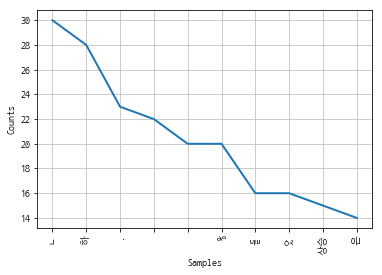

In [14]:
ko.plot(10)

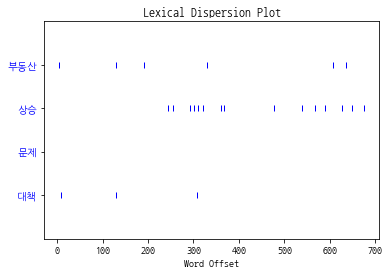

In [15]:
ko.dispersion_plot(['부동산', '상승', '문제', '대책'])

In [16]:
ko.count('부동산')

6

In [17]:
ko.concordance('부동산')

Displaying 6 of 6 matches:
                                      부동산 시장 안정화 대책 에 도 불구 하 고 서울 강남 집값 이 최대 폭 
 이번 주 ( 6 일 조사 ) 서울 강남구 아파트 값 은 8 · 2 부동산 대책 이후 100 일 만 에 최대 이 ㄴ 0.16 % 오르 았 다 
 서울 강남 집값 은 지나 ㄴ 8 월 2 일 대대적 이 ㄴ 정부 의 부동산 규제책 이 나오 ㄴ 직후 보합세 를 잇 어 오 았 다 . 감정원 에
 었 다 . 강남구 의 집값 상승 은 정부 정책 에 도 불구 하 고 부동산 불패 론 이 확고 하 ㄴ 지역 은 떨어지 지 않 는다는 시장 심리 
0.05 % 의 상승률 을 기록하 었 다 . 이날 발표 되 ㄴ KB 부동산 의 주간 동향 조사 에서 도 강남구 는 0.18 % 의 상승률 을 
 을 기록 하 며 뚜렷 하 ㄴ 상승 흐름 을 보여주 었 다 . KB 부동산 에 따르 면 전국 아파트 매매 가격 은 전주 대비 0.04 % 상승


In [18]:
ko.similar('상승')

하락


In [19]:
ko.similar('하락')

급등 상승


In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/skcc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
ko.collocations()

In [22]:
text

"정부의 집중적인 부동산 시장 안정화 대책에도 불구하고 서울 강남 집값이 최대폭으로 급등하며 '규제칼날'을 무색하게 만들었다. 강남 '재건축 바로미터' 격인 은마아파트가 고집하던 49층을 포기하는 대신 35층으로 낮춰 속도를 내면서 재건축 아파트 가격이 꿈틀거리고 이사철 좋은 학군을 형성한 지역 매물들이 높은 가격에 팔려나갔기 때문이다. 9일 한국감정원의 주간아파트 가격동향 조사에 의하면 이번주(6일 조사) 서울 강남구 아파트값은 8·2 부동산 대책 이후 100일만에 최대인 0.16% 올랐다. 규제 이후 숨을 죽이며 시장 상황을 지켜봤던 강남 집값이 본격적으로 반등 국면을 맞이할지에 시장의 관심이 쏠리고 있다. 서울 강남 집값은 지난 8월 2일 대대적인 정부의 부동산 규제책이 나온 직후 보합세를 이어왔다. 감정원에 의하면 규제 직후인 8월 7일 0.02% 하락한 강남 집값은 7주 연속으로 하락했다. 이후 지난 9월 25일 0.1% 상승하며 가까스로 반등에 성공했다. 당시 상승폭이 최소에 그치며 당분간 보합세를 유지할 것이라는 전망이 우세했다. 하지만 2주 전 0.04% 오른 강남 집값은 지난주 0.09% 상승한 뒤 이번주 0.16% 상승하며 8·2 대책 후 최대 상승폭을 보였다. 강남구의 집값 상승은 정부 정책에도 불구하고 부동산 불패론이 확고한 지역은 떨어지지 않는다는 시장 심리가 반영된 것으로 보인다. 실제 전국 아파트 평균(0.01% 상승)과 서울 평균(0.08% 상승)은 지난주와 큰 차이가 없었던 것으로 조사됐다. 대장주 격인 강남구의 질주가 돋보이는 것이다. 이는 은마아파트가 층수를 낮춰 본격적인 사업속도를 내면서 수요가 집중된 것으로 분석된다. 또 학교 배정을 앞두고 좋은 학군을 중심으로 한 인기 지역에 이동이 몰린 것으로 보인다. 지방에서도 인기 학군과 지역 편의성이 우수한 대구 수성구는 이번주 0.15% 상승하며 이러한 분위기에 동승했다. 수성구는 특히 최근 5주간 꾸준히 오르며 조용한 질주를 이어왔다. 강남구를 포함한 강남 4구(강남, 서초, 

#### POS Tagging

In [23]:
tags_ko = kkma.pos(text)
tags_ko

[('정부', 'NNG'),
 ('의', 'JKG'),
 ('집중적', 'NNG'),
 ('이', 'VCP'),
 ('ㄴ', 'ETD'),
 ('부동산', 'NNG'),
 ('시장', 'NNG'),
 ('안정화', 'NNG'),
 ('대책', 'NNG'),
 ('에', 'JKM'),
 ('도', 'JX'),
 ('불구', 'XR'),
 ('하', 'XSA'),
 ('고', 'ECE'),
 ('서울', 'NNG'),
 ('강남', 'NNG'),
 ('집값', 'NNG'),
 ('이', 'JKS'),
 ('최대', 'NNG'),
 ('폭', 'NNG'),
 ('으로', 'JKM'),
 ('급등', 'NNG'),
 ('하', 'XSV'),
 ('며', 'ECE'),
 ("'", 'SS'),
 ('규제', 'NNG'),
 ('칼날', 'NNG'),
 ("'", 'SS'),
 ('을', 'NNG'),
 ('무색', 'NNG'),
 ('하', 'XSV'),
 ('게', 'ECD'),
 ('만들', 'VV'),
 ('었', 'EPT'),
 ('다', 'EFN'),
 ('.', 'SF'),
 ('강남', 'NNG'),
 ("'", 'SS'),
 ('재', 'XPN'),
 ('건축', 'NNG'),
 ('바로미터', 'NNG'),
 ("'", 'SS'),
 ('격', 'NNB'),
 ('이', 'VCP'),
 ('ㄴ', 'ETD'),
 ('은', 'JX'),
 ('마', 'NNG'),
 ('아파트', 'NNG'),
 ('가', 'JKS'),
 ('고집', 'NNG'),
 ('하', 'XSV'),
 ('더', 'EPT'),
 ('ㄴ', 'ETD'),
 ('49', 'NR'),
 ('층', 'NNG'),
 ('을', 'JKO'),
 ('포기', 'NNG'),
 ('하', 'XSV'),
 ('는', 'ETD'),
 ('대신', 'NNP'),
 ('35', 'NR'),
 ('층', 'NNG'),
 ('으로', 'JKM'),
 ('낮추', 'VV'),
 ('어', 'ECS'),
 ('

In [24]:
kkma.nouns(text)

['정부',
 '집중적',
 '부동산',
 '시장',
 '안정화',
 '대책',
 '서울',
 '강남',
 '집값',
 '최대',
 '최대폭',
 '폭',
 '급등',
 '규제',
 '규제칼날',
 '칼날',
 '을',
 '무색',
 '건축',
 '바로미터',
 '격',
 '마',
 '마아파트',
 '아파트',
 '고집',
 '49',
 '49층',
 '층',
 '포기',
 '대신',
 '35',
 '35층',
 '속도',
 '가격',
 '이사철',
 '학군',
 '형성',
 '지역',
 '매물',
 '때문',
 '9',
 '9일',
 '일',
 '한국',
 '한국감정원',
 '감정원',
 '주간',
 '주간아파트',
 '가격동향',
 '동향',
 '조사',
 '이번',
 '이번주',
 '주',
 '6',
 '6일',
 '강남',
 '강남구',
 '구',
 '아파트값',
 '값',
 '8',
 '2',
 '이후',
 '100',
 '100일만',
 '만',
 '0.16',
 '숨',
 '상황',
 '본격적',
 '반등',
 '국면',
 '지에',
 '관심',
 '8월',
 '월',
 '2일',
 '대대적',
 '규제책',
 '직후',
 '보합세',
 '7',
 '7일',
 '0.02',
 '하락',
 '7주',
 '주',
 '연속',
 '9월',
 '25',
 '25일',
 '0.1',
 '상승',
 '성공',
 '당시',
 '상승폭',
 '최소',
 '유지',
 '전망',
 '우세',
 '2주',
 '전',
 '0.04',
 '지난주',
 '0.09',
 '뒤',
 '후',
 '정책',
 '불패',
 '심리',
 '반영',
 '실제',
 '전국',
 '평균',
 '0.01',
 '과',
 '0.08',
 '은',
 '차이',
 '대장',
 '대장주',
 '질주',
 '이',
 '층수',
 '사업',
 '사업속도',
 '수요',
 '집중',
 '분석',
 '학교',
 '배정',
 '중심',
 '인기',
 '이동',
 '지방',
 '편의성',
 '우수',
 '대

In [25]:
grammar = "NP:{<NNG>+}"
parser_ko = nltk.RegexpParser(grammar)
chunks_ko = parser_ko.parse(tags_ko)
chunks_ko.pprint()

(S
  (NP 정부/NNG)
  의/JKG
  (NP 집중적/NNG)
  이/VCP
  ㄴ/ETD
  (NP 부동산/NNG 시장/NNG 안정화/NNG 대책/NNG)
  에/JKM
  도/JX
  불구/XR
  하/XSA
  고/ECE
  (NP 서울/NNG 강남/NNG 집값/NNG)
  이/JKS
  (NP 최대/NNG 폭/NNG)
  으로/JKM
  (NP 급등/NNG)
  하/XSV
  며/ECE
  '/SS
  (NP 규제/NNG 칼날/NNG)
  '/SS
  (NP 을/NNG 무색/NNG)
  하/XSV
  게/ECD
  만들/VV
  었/EPT
  다/EFN
  ./SF
  (NP 강남/NNG)
  '/SS
  재/XPN
  (NP 건축/NNG 바로미터/NNG)
  '/SS
  격/NNB
  이/VCP
  ㄴ/ETD
  은/JX
  (NP 마/NNG 아파트/NNG)
  가/JKS
  (NP 고집/NNG)
  하/XSV
  더/EPT
  ㄴ/ETD
  49/NR
  (NP 층/NNG)
  을/JKO
  (NP 포기/NNG)
  하/XSV
  는/ETD
  대신/NNP
  35/NR
  (NP 층/NNG)
  으로/JKM
  낮추/VV
  어/ECS
  (NP 속도/NNG)
  를/JKO
  내/VV
  면서/ECE
  재/XPN
  (NP 건축/NNG 아파트/NNG 가격/NNG)
  이/JKS
  꿈틀거리/VV
  고/ECE
  (NP 이사철/NNG)
  좋/VA
  은/ETD
  (NP 학군/NNG)
  을/JKO
  (NP 형성/NNG)
  하/XSV
  ㄴ/ETD
  (NP 지역/NNG 매물/NNG)
  들/XSN
  이/JKS
  높/VA
  은/ETD
  (NP 가격/NNG)
  에/JKM
  팔리/VV
  어/ECS
  나가/VXV
  었/EPT
  기/ETN
  때문/NNB
  이/VCP
  다/EFN
  ./SF
  9/NR
  일/NNM
  (NP 한국/NNG 감정원/NNG)
  의/JKG
  (NP 주간/NNG 아파트/NNG 가격/N

## Load Data

In [26]:
data = pd.read_json('rss_dump_20171127.json')
data['datetime'] = pd.to_datetime(data['datetime'])
pool = data[data['body'] != '']
pool

body            datetime  \
0     홍준표 자유한국당 대표는 27일 “우리 당 뉴스가 (포털) 다음에는 요즘 가끔 나... 2017-11-27 14:36:54   
1     문재인 대통령의 부인 김정숙 여사가 청와대 경내에서 수확해 직접 말려 만든 곶감을... 2017-11-27 14:16:11   
2     자유한국당 혁신위원회가 서민이 차별받지 않고 공정한 경쟁을 치를 수 있도록 올해로... 2017-11-27 14:14:10   
3     바른정당과 일단 정책연대를 추진키로 한 국민의당 내에서 27일 유승민 바른정당 대... 2017-11-27 14:01:50   
4     국민의당 최고위원회의에 ‘이유식’이 등장했다. 지난주 바른정당과의 통합에 반대하는... 2017-11-27 11:29:26   
5     유승민 바른정당 대표는 27일 “최근 구속적부심에서 석방을 결정한 법관에 대한 언... 2017-11-27 11:11:11   
6     해외 북한 식당 중 가장 규모가 큰 것으로 알려진 ‘평양 고려관’이 최근 영업을 ... 2017-11-27 11:08:23   
7     친박(親朴)으로 분류되는 김태흠 자유한국당 최고위원이 27일 당 회의 공개발언을 ... 2017-11-27 10:58:05   
8     추미애 더불어민주당 대표는 27일 법원이 최근 구속적부심을 통해 김관진 전 국방장... 2017-11-27 10:24:20   
9     자유한국당 정우택 원내대표는 27일 한국당·국민의당·바른정당 3당 통합의 가능성과... 2017-11-27 10:19:54   
10    여당인 더불어민주당과 정부는 27일 주거복지로드맵 당정(黨政) 협의를 갖고 서민과... 2017-11-27 09:02:53   
11   헌법상 내년도 예산안 처리 시한은 이번 주말인 12월 2일이다. 민주당은 26일 "... 2017-11-27 03:13:00   
13   문재인〈사진〉 대통령은 27일 하루 연차 휴가를 낼 계획이라고 청와대가 26일 밝혔... 2017-11-27 03:03:17   
14   청와대 조국 민정수석은 26일 낙태죄와 관련해 "내년에 임신중절 실태 조사를 실시,... 2017-11-27 03:03:17   
15   시진핑(習近平) 국가주석의 특사로 방북했던 쑹타오(宋濤) 중국 공산당 대외연락부장이... 2017-11-27 03:03:17   
16   북한이 지난 13일 발생한 판문점 공동경비구역(JSA) 귀순 사건 이후 추가 탈북을... 2017-11-27 03:03:17   
17   여야가 문재인 정부 첫 예산안 심사에서 팽팽한 기 싸움을 벌이면서 예산안이 법정 시... 2017-11-27 03:03:17   
18   여야(與野)가 이번 주 막판 예산안 심사에서 최대 쟁점으로 꼽는 건 '공무원 증원'... 2017-11-27 03:03:17   
19   국민의당 안철수 대표는 최근 바른정당 통합 문제와 관련해 "이번엔 호랑이들을 불러들... 2017-11-27 03:03:17   
20   자유한국당 홍준표 대표가 주말 동안 당 안팎을 향해 "가소롭다" "망나니 칼춤" "... 2017-11-27 03:03:17   
21   더불어민주당은 법원이 군 사이버사령부의 '정치 댓글 공작'에 관여한 혐의로 구속됐던... 2017-11-27 03:03:17   
22    문재인 대통령의 부인 김정숙 여사가 청와대 경내 감나무에서 손수 따서 말린 곶감을... 2017-11-26 20:46:00   
23    문재인 대통령은 평창 동계올림픽과 동계패럴림픽 입장권을 사고 인증샷을 올린 시민 ... 2017-11-26 17:32:49   
24    문재인 대통령이 27일 하루 연차휴가를 내고 휴식할 예정이라고 26일 청와대가 밝... 2017-11-26 17:25:30   
25    군 당국이 최전방 지역에서 대북 확성기를 통해 북한군 병사의 판문점 공동경비구역(... 2017-11-26 16:50:57   
26    국민의당 안철수 대표는 26일 중증외상센터와 관련한 내년 정부 예산이 40억원 가... 2017-11-26 16:33:24   
27    청와대는 26일 낙태죄 폐지 국민청원과 관련해 ‘임신중절 실태조사’를 재개하겠다고... 2017-11-26 15:03:29   
28    북·중 국경선 부근에 있는 중국 여행사들이 최근 정치적 긴장과 여행객 감소로 인해... 2017-11-26 14:42:09   
29    더불어민주당 박범계 의원은 법원이 최근 구속적부심을 통해 김관진 전 국방장관에 이... 2017-11-26 14:27:23   
30   오는 30일 워크숍 개최전남, 전국 섬의 65% 차지‘섬의 시대’에 섬정책 제시목포... 2017-11-27 14:30:19   
..                                                 ...                 ...   
750  콜 받지 않아도 제재…"승차거부 근절"택시호출서비스 '카카오택시(카카오T)가 장거리... 2017-11-27 08:07:34   
751  페이커 마우스·최정 유니폼 등 나와수익금 전액 취약계층 난방비 및 물품 지원세계 최... 2017-11-26 10:20:23   
752  롤러코스터 ‘더 그레이트 레고 레이스’ 운영 시작삼성전자는 레고랜드 말레이시아 리조... 2017-11-26 10:05:49   
753  ‘인터랙티브 타임슬라이스’ 공동 개발 등 예정KT 광화문빌딩 이스트 사옥에서 4D리... 2017-11-26 10:00:11   
754  내년부터 LTE 스마트폰 공급 예정삼성전자가 영국 차세대 재난안전통신망 시스템인 긴... 2017-11-26 09:47:02   
755  2년간 취약계층아동 4천명에 위치알리미·통신이용료 무상 지원LG유플러스는 보건복지부... 2017-11-26 09:15:41   
756  미니홈피 인기던 2000년대 음악 감성 저격뮤직플랫폼 멜론이 '음악에 지능을 더하다... 2017-11-24 15:19:39   
757  스마트폰 보험 상품 내놓은 SK텔레콤KT와 LG유플러스는 중고폰 보상 프로그램 선봬... 2017-11-24 14:54:41   
758  가로, 세로 38mm 콤팩트한 크기, 약 22g 무게원터치 녹음, 자동으로 소리 감... 2017-11-24 14:21:01   
759  '아이폰X' 구입위해 6박 7일 기다린 1호 고객줄서기 현장 영상으로 보기[영상] ... 2017-11-24 12:35:05   
781  박근혜 재판 42일만에 재개…불출석 사유서 제출 박근혜 전 대통령의 1심 재판이 유... 2017-11-27 11:43:35   
782  정유라 집 괴한 침입 / KBS 방송화면"모든 것이 미스터리하다. 분명한 것은 우발... 2017-11-27 11:39:00   
783  "고려대학교 국제어학원 영어교육 프로그램(EiE), 영어교육콘텐츠부문 대상"영어교육... 2017-11-27 10:21:31   
784  가수 박정운 가수 박정운(52·사진)이 2천억원대 가상화폐 투자 사기 사건에 연루됐... 2017-11-27 07:22:05   
785  가수 박정운, 2천억대 가상화폐 사기 연루 가수 박정운 가상화폐 사기 연루 의혹_Y... 2017-11-27 06:28:55   
786  여성가족부는 다음 달 1일까지 '성폭력·가정폭력 추방주간'을 맞아 기념행사와 국민실... 2017-11-26 16:12:30   
787  대구에서 2018학년도 대학수학능력시험 만점자 2명이 나왔다. 이 중 1명은 유일한... 2017-11-26 15:27:57   
788  한국경제DB 경찰이 '비선 실세' 최순실 씨 딸 정유라 씨(21)의 집에 침입해 정... 2017-11-26 15:20:26   
789  사진=게티이미지뱅크 사진출처=게티이미지뱅크청와대가 8년간 중단됐던 정부의 '임신중절... 2017-11-26 14:59:44   
790  정종제 중앙재난대책본부 총괄조정관이 26일 오후 2시 포항지진 피해 후속 대책에 대... 2017-11-26 14:46:

In [27]:
with open('full_list.dump', 'rb') as f:
    full_list = pickle.load(f)
full_list

[' 홍준표 자유한국당 대표는 27일 “우리 당 뉴스가 (포털) 다음에는 요즘 가끔 나오지만 네이버 뉴스 메인 바탕화면에는 없다. 나는 요즘 ‘다음’만 본다”고 말했다. 홍 대표는 이날 당 최고위원회의에서 “(우리당이) 네이버를 공격하니까 네이버에서 아예 뉴스 자체를 올리지 않는 것 같다”며 이 같이 밝혔다. 이날 홍 대표의 발언은 당 포털정상화 테스크포스(TF) 팀장인 박대출 의원이 “네이버의 오너 격인 이해진 전 의장이 (한달 전) 국회 국정감사 증인으로 출석했을 때 약속했던 포털의 뉴스 조작과 편향성 문제, 사이버골목상권 침해, 실시간 검색어 조작에 대한 개선대책을 이행하지 않고 있다”고 지적한 데 대한 반응이었다. 박 의원은 이날 당 회의에서 “정기국회 국감 때 이해진 전 의장을 상대로 ‘네이버가 무허가 뉴스토랑처럼 운영되고 있다’는 질타와 지적이 있었다”며 “뉴스토랑이란 뉴스 레스토랑이란 뜻인데, 네이버는 50명에 불과한 뉴스 배열 인력들이 뉴스를 멋대로 요리해 2500만명의 여론을 좌지우지하고 있다”고 말했다. 그는 이어 “그런데 지금 한 달 지난 이 시점까지 (네이버는) 어떤 약속도 이행하지 않고 있다”며 “네이버를 상대로 오늘 국민과의 약속을, 국회와의 약속을 이행하라는 촉구를 다시 한 번 하고자 한다”고 했다.',
 ' 문재인 대통령의 부인 김정숙 여사가 청와대 경내에서 수확해 직접 말려 만든 곶감을 청와대 직원과 출입기자, 그리고 미혼모 모임에 선물할 계획이다. 청와대 관계자는 지난 26일 "김 여사가 미혼모 문제에 꾸준히 관심을 가져왔다”며 “직접 만든 곶감을 청와대 직원과 미혼모 모임에 보낼 계획”이라고 밝혔다. 청와대는 이날 김 여사가 앞치마에 비닐 보호대, 장갑을 착용하고 감을 쌓아놓은 채 직접 깎는 사진도 공개했다. 춘추관에 있는 청와대 출입 기자들에게도 곶감을 제공했다. 청와대가 \'김정숙 여사 곶감\'을 공개한 것은 이번이 처음이 아니다. 이달 초 도널드 트럼프 미국 대통령 부부의 국빈 방한 때 이미 화제가 됐던 아이템이다. 트럼

In [28]:
tmp = pool.loc[300, 'body']
tmp

'오는 30일 열리는 한국은행 금융통화위원회에 시장의 관심이 쏠리고 있다. 올해 경제성장률 3% 초과 달성이 유력한 데다 가계부채 역시 1400조원을 돌파하는 등 불어나고 있어 한은의 금리 인상 명분이 커졌다는 의견이 지배적이다27일 한국은행 등에 따르면 한은은 오는 30일 금통위를 열고 기준금리 인상 여부를 결정할 예정이다. 이날 기준금리를 올리면 한은 2011년 6월 이후 6년 5개월 만에 금리 인상 결정을 내리는 셈이다.시장 참여자들은 한은이 기준금리 인상을 결정할 가능성이 높다고 보고 있다.지난달 금통위에서 금리인상 소수의견(1명)이 등장한 것을 사실상의 금리 인상 시그널로 본 것이다. 이 총재 역시 지난달 금통위 회의 직후 기자간담회에서 "국내 경기가 금융완화의 정도를 조정할 수 있을 정도로 성숙한 것으로 판단한다"고 밝히며 금리인상을 사실상 지지했다.10월 금통위 의사록에서 금통위원 2명은 조만간 인상이 필요하다는 의견을 냈다. 중립 성향으로 분류된 함준호 위원 역시 최근 기자간담회에서 금리 인상 필요성을 시사했다.국내 경제지표 역시 긍정적인 흐름을 보이고 있어 금리인상론에 힘을 실어 주고 있다. 11월 소비자심리지수(CCSI)는 6년11개월 만에 최대치(112.3)를 기록했다. 북한 리스크가 줄어들고 중국과 긴장 관계가 풀렸기 때문으로 한은은 분석했다. 코스피 역시 올해 들어 25.56% 오르는 등 주식시장도 호황을 보이고 있다. 올해 목표하고 있는 3% 성장 역시 무리없이 달성할 수 있을 것으로 보인다. 이달 국제통화기금(IMF)은 한국 정부와의 연례협의 결과를 발표하면서 한국의 경제성장률 전망치를 3.0%에서 3.2%로 상향조정했다.3분기(7∼9월) 경제성장률 역시 1.4%를 기록하면서 올해 경제성장률 3% 돌파가 유력하다는 분석도 나온다. 눈덩이처럼 불어나는 가계부채 또한 금리 인상의 명분으로 작용하고 있다. 9월 말 기준 가계부채는 1419조 원으로 한은이 관련 통계를 내기 시작한 2002년 4분기 이후 최고치를 기록했다. 미국을 포함한 주

In [29]:
with open('full_txt.txt', 'r') as f:
    full = f.read()
full

' 홍준표 자유한국당 대표는 27일 “우리 당 뉴스가 (포털) 다음에는 요즘 가끔 나오지만 네이버 뉴스 메인 바탕화면에는 없다. 나는 요즘 ‘다음’만 본다”고 말했다. 홍 대표는 이날 당 최고위원회의에서 “(우리당이) 네이버를 공격하니까 네이버에서 아예 뉴스 자체를 올리지 않는 것 같다”며 이 같이 밝혔다. 이날 홍 대표의 발언은 당 포털정상화 테스크포스(TF) 팀장인 박대출 의원이 “네이버의 오너 격인 이해진 전 의장이 (한달 전) 국회 국정감사 증인으로 출석했을 때 약속했던 포털의 뉴스 조작과 편향성 문제, 사이버골목상권 침해, 실시간 검색어 조작에 대한 개선대책을 이행하지 않고 있다”고 지적한 데 대한 반응이었다. 박 의원은 이날 당 회의에서 “정기국회 국감 때 이해진 전 의장을 상대로 ‘네이버가 무허가 뉴스토랑처럼 운영되고 있다’는 질타와 지적이 있었다”며 “뉴스토랑이란 뉴스 레스토랑이란 뜻인데, 네이버는 50명에 불과한 뉴스 배열 인력들이 뉴스를 멋대로 요리해 2500만명의 여론을 좌지우지하고 있다”고 말했다. 그는 이어 “그런데 지금 한 달 지난 이 시점까지 (네이버는) 어떤 약속도 이행하지 않고 있다”며 “네이버를 상대로 오늘 국민과의 약속을, 국회와의 약속을 이행하라는 촉구를 다시 한 번 하고자 한다”고 했다.\n 문재인 대통령의 부인 김정숙 여사가 청와대 경내에서 수확해 직접 말려 만든 곶감을 청와대 직원과 출입기자, 그리고 미혼모 모임에 선물할 계획이다. 청와대 관계자는 지난 26일 "김 여사가 미혼모 문제에 꾸준히 관심을 가져왔다”며 “직접 만든 곶감을 청와대 직원과 미혼모 모임에 보낼 계획”이라고 밝혔다. 청와대는 이날 김 여사가 앞치마에 비닐 보호대, 장갑을 착용하고 감을 쌓아놓은 채 직접 깎는 사진도 공개했다. 춘추관에 있는 청와대 출입 기자들에게도 곶감을 제공했다. 청와대가 \'김정숙 여사 곶감\'을 공개한 것은 이번이 처음이 아니다. 이달 초 도널드 트럼프 미국 대통령 부부의 국빈 방한 때 이미 화제가 됐던 아이템이다. 트럼프 부부

### Pre-Defined Tokenization

In [30]:
kkma = Kkma()  # 세종말뭉치
twit = Twitter()  # Twitter 말뭉치
hann = Hannanum()  # Hannanum 말뭉치

In [31]:
kkma.pos(tmp)

[('오', 'VV'),
 ('는', 'ETD'),
 ('30', 'NR'),
 ('일', 'NNM'),
 ('열리', 'VV'),
 ('는', 'ETD'),
 ('한국', 'NNG'),
 ('은행', 'NNG'),
 ('금융', 'NNG'),
 ('통화', 'NNG'),
 ('위원회', 'NNG'),
 ('에', 'JKM'),
 ('시장', 'NNG'),
 ('의', 'JKG'),
 ('관심', 'NNG'),
 ('이', 'JKS'),
 ('쏠리', 'VV'),
 ('고', 'ECE'),
 ('있', 'VXV'),
 ('다', 'EFN'),
 ('.', 'SF'),
 ('올해', 'NNG'),
 ('경제', 'NNG'),
 ('성장률', 'NNG'),
 ('3', 'NR'),
 ('%', 'SW'),
 ('초과', 'NNG'),
 ('달성', 'NNG'),
 ('이', 'JKS'),
 ('유력', 'NNG'),
 ('하', 'XSV'),
 ('ㄴ', 'ETD'),
 ('데', 'NNB'),
 ('이', 'VCP'),
 ('다', 'EFN'),
 ('가계', 'NNG'),
 ('부채', 'NNG'),
 ('역시', 'MAG'),
 ('1400', 'NR'),
 ('조', 'NR'),
 ('원', 'NNM'),
 ('을', 'JKO'),
 ('돌파', 'NNG'),
 ('하', 'XSV'),
 ('는', 'ETD'),
 ('등', 'NNB'),
 ('불어나', 'VV'),
 ('고', 'ECE'),
 ('있', 'VXV'),
 ('어', 'ECD'),
 ('한', 'MDN'),
 ('은의', 'NNG'),
 ('금리', 'NNG'),
 ('인상', 'NNG'),
 ('명분', 'NNG'),
 ('이', 'JKS'),
 ('커지', 'VV'),
 ('었', 'EPT'),
 ('다는', 'ETD'),
 ('의견', 'NNG'),
 ('이', 'JKS'),
 ('지배적', 'NNG'),
 ('이', 'VCP'),
 ('다', 'EFN'),
 ('27', 'NR'),


### Data-Driven Tokenization

In [32]:
corpus = DoublespaceLineCorpus('full_txt.txt', iter_sent=True)
word_extractor = WordExtractor(corpus, min_count=10)
words = word_extractor.extract()
words

training was done. used memory 1.923 Gbry 1.969 Gb
all cohesion probabilities was computed. # words = 7760
all branching entropies was computed # words = 34833
all accessor variety was computed # words = 34833


{'촛': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=-0.0, right_branching_entropy=-0.0, left_accessor_variety=1, right_accessor_variety=1, leftside_frequency=12, rightside_frequency=0),
 '변': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=3.4240961551187468, right_branching_entropy=1.2910597995792608, left_accessor_variety=42, right_accessor_variety=10, leftside_frequency=235, rightside_frequency=33),
 '싸': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=1.3013055504369102, right_branching_entropy=0, left_accessor_variety=4, right_accessor_variety=0, leftside_frequency=25, rightside_frequency=0),
 '압': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=2.303618236676076, right_branching_entropy=-0.0, left_accessor_variety=11, right_accessor_variety=1, leftside_frequency=65, rightside_frequency=0),
 '템': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=-0.0, right_branching_

#### L-Tokenizer

In [33]:
test_str = "정부의 집중적인 부동산 시장 안정화 대책에도 불구하고 서울 강남 집값이 최대폭으로 급등하며 '규제칼날'을 무색하게 만들었다."
scores = {w:s.cohesion_forward for w, s in words.items()}
tokenizer = LTokenizer(scores=scores)
tokenizer.tokenize(test_str)

['정부',
 '의',
 '집중',
 '적인',
 '부동산',
 '시장',
 '안정',
 '화',
 '대책',
 '에도',
 '불구하고',
 '서울',
 '강남',
 '집값이',
 '최대',
 '폭으로',
 '급등',
 '하며',
 "'규제칼날'을",
 '무색하게',
 '만들었다.']

#### Max Score Tokenizer

In [34]:
test_str = "정부의 집중적인 부동산 시장 안정화 대책에도 불구하고 서울 강남 집값이 최대폭으로 급등하며 '규제칼날'을 무색하게 만들었다."
scores = {w:s.cohesion_forward for w, s in words.items()}
tokenizer = MaxScoreTokenizer(scores=scores)
tokenizer.tokenize(test_str)

['정부',
 '의',
 '집중',
 '적인',
 '부동산',
 '시장',
 '안정',
 '화',
 '대책',
 '에도',
 '불구하고',
 '서울',
 '강남',
 '집값이',
 '최대',
 '폭으로',
 '급등',
 '하며',
 "'",
 '규제',
 "칼날'을",
 '무색하게',
 '만들었다.']

### Noun Extraction

In [35]:
noun_extractor = LRNounExtractor(min_count=10)
nouns = noun_extractor.train_extract(corpus, minimum_noun_score=0.5)

used default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
2398 r features was loaded
scanning completed
(L,R) has (5892, 3413) tokens
building lr-graph completed

In [36]:
nouns.keys()

dict_keys(['리스크', '변호사', '공공기관', '등급', '권역', '제안', '유형', '참가자', '기념', '연속', '한강', '5.4', '전망', '등장', '궁금', '"다', '이진', '아이들', '"시', '이야기', '엄마', '불편', '설치', '의혹', '충전', '의결', '지속', '원금', '비중', '흉기', '연소득', '빅데이터', '소유', '수가', '겨울', '해외', '2일', '출연', '세바시', '배후', '등으', '정권', '때문', '연결', '완공', '위축', '활성화', '30분', '수입', '영역', '대부', '시골', '주민들', '모양', '탄핵', '매도', '제공', '물론', '제조업', '지진으', '혐의', '생쥐', '사우디', '가속화', '반복', '변호인', '특사', '고민', '증거', '유용', '대변', '전남', '할인', '연말정산', '전자', '전세임대', '비핵화', '용기', '대만', '이탈', '연기', '지난', '군부', '만큼', '있는데', '나사', '하락', '감소', '소속', '극단주', '권역외상센터', '시청률', '자리', '올해', '3월', '시민', '재정', '여부', '고용', '비판', '되기', 'A씨', "'사드", '포기', 'ETF', '조정', '친박', '이슬', '계약', '선정', '정확', '실수', '테러', '평가', '예상', '감자', '"이', '광화문', '담당', '주인', 'TV', '에너지', '한반', '대학생', '월세', '장면', '패턴', '부정적', '불구', '기준', '상대적으', '사원', '갈등', '지속적', '대연정', '금리', '전반', '공간', '스스', '보유', '로봇', '편리', '10개', '하기', '전달', '선보', '여시재', '경우', '문의', '지정', '지원', '폭탄', '신도들', '업무추진비', '촬영', '재개', '가상화폐

In [37]:
nouns['규제']

NounScore(frequency=84, score=0.888692755102041, known_r_ratio=0.98)

### Sentiment Analysis

#### Example : NSMC

In [135]:
def read_data(filename):
    with open(filename, 'r') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[1:]   # header 제외
    return data

train_data = read_data('nsmc/ratings_train.txt')
test_data = read_data('nsmc/ratings_test.txt')

train_data = train_data[:2000]
test_data = test_data[:2000]

In [162]:
def tokenize(doc):
    pos_tagger = Kkma()
    # norm, stem은 optional
    return ['/'.join(t) for t in pos_tagger.pos(doc)]

In [ ]:
train_docs = [(tokenize(row[1]), row[2]) for row in train_data]
test_docs = [(tokenize(row[1]), row[2]) for row in test_data]

In [137]:
train_docs[:2]

[(['아/VV',
   '아/ECS',
   '더빙/NNG',
   '../SW',
   '진짜/MAG',
   '짜증나/VV',
   '네요/EFN',
   '목소리/NNG'],
  '0'),
 (['흠/NNG',
   '.../SE',
   '포스터/NNG',
   '보고/NNG',
   '초/NNB',
   '딩/UN',
   '영화/NNG',
   '줄/NNG',
   '..../SW',
   '오버/NNG',
   '연기/NNG',
   '조차/JX',
   '가볍/VA',
   '지/ECD',
   '않/VXA',
   '구나/EFI'],
  '1')]

In [138]:
tokens = [t for d in train_docs for t in d[0]]
print(len(tokens))

import nltk
text = nltk.Text(tokens, name='NMSC')
print(text)

print(len(text.tokens))                 # returns number of tokens
# => 2194536
print(len(set(text.tokens)))            # returns number of unique tokens
# => 48765
pprint(text.vocab().most_common(10))

40144
<Text: NMSC>
40144
5671
[('ㄴ/ETD', 1062),
 ('./SF', 953),
 ('이/VCP', 788),
 ('영화/NNG', 749),
 ('고/ECE', 643),
 ('이/JKS', 640),
 ('는/ETD', 600),
 ('하/XSV', 589),
 ('보/VV', 510),
 ('었/EPT', 480)]


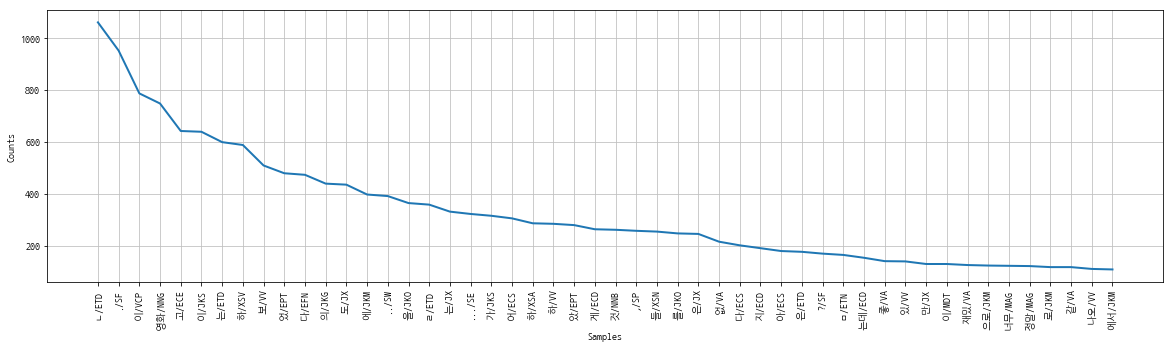

In [139]:
plt.figure(figsize=(20, 5))
text.plot(50)

Collocations

In [140]:
text.collocations()

다/EFN ./SF; ㄹ/ETD 수/NNB; 더/EPT ㄴ/ETD; 보/VXV 았/EPT; 지/ECD 않/VXV; 아/VV
아/ECS; 고/ECE 싶/VXA; ㄴ/ETD 영화/NNG; 하/XSA ㄴ/ETD; 었/EPT 다/EFN; 하/XSV
ㄴ/ETD; 보/VV 았/EPT; 이/VCP 다/EFN; 배우/NNG 들/XSN; 이/MDT 영화/NNG; ㄴ다/EFN
./SF; 지루/XR 하/XSA; 는/ETD 것/NNB; 었/EPT 더/EPT; 같/VA 은/ETD


Sentiment Classification

In [141]:
selected_words = [f[0] for f in text.vocab().most_common(500)]
def term_exists(doc):
    return {'exists({})'.format(word): (word in set(doc)) for word in selected_words}


train_xy = [(term_exists(d), c) for d, c in train_docs]
test_xy = [(term_exists(d), c) for d, c in test_docs]

In [142]:
train_xy

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


TF, TF-IDF (more frequent, it can be less important)

In [143]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

##### Naive Bayes Classifier

In [144]:
classifier = nltk.NaiveBayesClassifier.train(train_xy)
print("Test Accuracy : %.3f" % nltk.classify.accuracy(classifier, test_xy))
classifier.show_most_informative_features(10)

Test Accuracy : 0.760
Most Informative Features
          exists(명작/NNG) = True                1 : 0      =     15.3 : 1.0
            exists(높/VA) = True                0 : 1      =     15.3 : 1.0
          exists(재미없/VA) = True                0 : 1      =     15.2 : 1.0
         exists(쓰레기/NNG) = True                0 : 1      =     14.7 : 1.0
           exists(아깝/VA) = True                0 : 1      =     13.6 : 1.0
          exists(별로/MAG) = True                0 : 1      =     11.4 : 1.0
          exists(최고/NNG) = True                1 : 0      =     11.0 : 1.0
          exists(최악/NNG) = True                0 : 1      =     10.8 : 1.0
           exists(개/NNM) = True                0 : 1      =     10.1 : 1.0
           exists(굿/NNG) = True                1 : 0      =      9.9 : 1.0


##### Decision Tree Classifier

In [146]:
classifier = nltk.DecisionTreeClassifier.train(train_xy)
print("Test Accuracy : %.3f" % nltk.classify.accuracy(classifier, test_xy))

Test Accuracy : 0.690


<function nltk.classify.decisiontree.DecisionTreeClassifier.best_stump>

##### Maximum Entropy Classifier

In [153]:
classifier = nltk.MaxentClassifier.train(train_xy)
print("Test Accuracy : %.3f" % nltk.classify.accuracy(classifier, test_xy))

  ==> Training (100 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.494
             2          -0.68637        0.509
             3          -0.67990        0.509
             4          -0.67397        0.509
             5          -0.66870        0.509
             6          -0.66415        0.509
             7          -0.66034        0.509
             8          -0.65720        0.509
             9          -0.65465        0.509
            10          -0.65263        0.509
            11          -0.65103        0.509
            12          -0.64979        0.509
            13          -0.64882        0.509
            14          -0.64807        0.509
            15          -0.64750        0.509
            16          -0.64706        0.509
            17          -0.64672        0.509
            18          -0.64647        0.509
            19          -0.64627        0.509
 

In [154]:
classifier.show_most_informative_features(10)

  39.600 exists(아/VV)==True and label is '0'
  39.600 exists(짜증나/VV)==True and label is '0'
  39.600 exists(포스터/NNG)==True and label is '1'
  39.600 exists(보고/NNG)==True and label is '1'
  39.600 exists(이야기/NNG)==True and label is '0'
  39.600 exists(솔직히/MAG)==True and label is '0'
  39.600 exists(에서/JKM)==True and label is '1'
  39.600 exists(보이/VV)==True and label is '1'
  39.600 exists(너무나/MAG)==True and label is '1'
  39.600 exists(맨/NNG)==True and label is '1'


---

#### Doc2Vec

In [313]:
from gensim.models.doc2vec import TaggedDocument
from collections import namedtuple

TaggedDocument = namedtuple('TaggedDocument', 'words tags')

tagged_train_docs = [TaggedDocument(d, [c]) for d, c in train_docs]
tagged_test_docs = [TaggedDocument(d, [c]) for d, c in test_docs]

In [314]:
tagged_train_docs

[TaggedDocument(words=['아/VV', '아/ECS', '더빙/NNG', '../SW', '진짜/MAG', '짜증나/VV', '네요/EFN', '목소리/NNG'], tags=['0']),
 TaggedDocument(words=['흠/NNG', '.../SE', '포스터/NNG', '보고/NNG', '초/NNB', '딩/UN', '영화/NNG', '줄/NNG', '..../SW', '오버/NNG', '연기/NNG', '조차/JX', '가볍/VA', '지/ECD', '않/VXA', '구나/EFI'], tags=['1']),
 TaggedDocument(words=['너무/MAG', '재/NNG', '밓/UN', '어/VV', '었/EPT', '다/EFN', '그래서/MAC', '보/VV', '는/ETD', '것/NNB', '을/JKO', '추천/NNG', '하/XSV', 'ㄴ다/EFN'], tags=['0']),
 TaggedDocument(words=['교도소/NNG', '이야기/NNG', '구/XSN', '멀/VA', 'ㄴ/ETD', '../SW', '솔직히/MAG', '재미/NNG', '는/JX', '없/VA', '다/ECS', '../SW', '평/NNM', '점/NNG', '조정/NNG'], tags=['0']),
 TaggedDocument(words=['사이몬페그/UN', '의/JKG', '익살/NNG', '스럽/XSA', 'ㄴ/ETD', '연기/NNG', '가/JKS', '돋보이/VV', '었/EPT', '더/EPT', 'ㄴ/ETD', '영화/NNG', '!/SF', '스파이/NNG', '더/NNG', '맨/NNG', '에서/JKM', '늙/VV', '어/ECD', '보이/VV', '기/ETN', '만/JX', '하/VV', '었/EPT', '더/EPT', 'ㄴ/ETD', '커스틴/NNG', '던스트/UN', '가/JKS', '너무나/MAG', '도/JX', '이쁘/VV', '어/ECS', '보이/VV', '었/EPT', '다/EF

In [344]:
from gensim.models import doc2vec

# 사전 구축
doc_vectorizer = doc2vec.Doc2Vec(size=100, alpha=0.025, min_alpha=0.025, seed=1234)
doc_vectorizer.build_vocab(tagged_train_docs)

# Train document vectors!
for epoch in range(10):
    doc_vectorizer.train(tagged_train_docs)
    doc_vectorizer.alpha -= 0.002  # decrease the learning rate
    doc_vectorizer.min_alpha = doc_vectorizer.alpha  # fix the learning rate, no decay
    
# To save
# doc_vectorizer.save('doc2vec.model')

pprint(doc_vectorizer.most_similar('공포/NNG'))

ValueError: You must specify either total_examples or total_words, for proper alpha and progress calculations. The usual value is total_examples=model.corpus_count.

In [ ]:
# 사전 구축
doc_vectorizer = doc2vec.Doc2Vec(size=100, alpha=0.025, min_alpha=0.025, seed=1234)
doc_vectorizer.build_vocab(tagged_train_docs)

# Train document vectors!
for epoch in range(10):
    doc_vectorizer.train(tagged_train_docs)
    doc_vectorizer.alpha -= 0.002  # decrease the learning rate
    doc_vectorizer.min_alpha = doc_vectorizer.alpha  # fix the learning rate, no decay
    
# To save
# doc_vectorizer.save('doc2vec.model')

pprint(doc_vectorizer.most_similar('공포/NNG'))

In [338]:
from gensim.models.doc2vec import Doc2Vec

model = Doc2Vec(size=100, window=8, min_count=5, workers=4)
model.build_vocab(tagged_train_docs)

#model = Doc2Vec(tagged_train_docs, size=100, window=8, min_count=5, workers=4)

model.save('doc2vec.model')
model = Doc2Vec.load('doc2vec.model')

In [348]:
model.most_similar('명작/NNG')

[('러/ECD', 0.29817837476730347),
 ('범죄/NNG', 0.29503583908081055),
 ('눈물/NNG', 0.28152406215667725),
 ('마지막/NNG', 0.2668412923812866),
 ('그나마/MAG', 0.2653003931045532),
 ('ㅁ/ETN', 0.2630321681499481),
 ('의/JKG', 0.25614476203918457),
 ('3/NR', 0.25305381417274475),
 ('가볍/VA', 0.25123998522758484),
 ('더빙/NNG', 0.24443186819553375)]

In [155]:
train_data[:2]

[['9976970', '아 더빙.. 진짜 짜증나네요 목소리', '0'],
 ['3819312', '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나', '1']]

In [159]:
kkma

In [161]:
def tokenize(doc):
    pos_tagger = kkma
    # norm, stem은 optional
    return ['/'.join(t) for t in pos_tagger.pos(doc)]

In [ ]:
train_docs = [(tokenize(row[1]), row[2]) for row in train_data]
test_docs = [(tokenize(row[1]), row[2]) for row in test_data]

In [176]:
train_docs

[(['아/VV',
   '아/ECS',
   '더빙/NNG',
   '../SW',
   '진짜/MAG',
   '짜증나/VV',
   '네요/EFN',
   '목소리/NNG'],
  '0'),
 (['흠/NNG',
   '.../SE',
   '포스터/NNG',
   '보고/NNG',
   '초/NNB',
   '딩/UN',
   '영화/NNG',
   '줄/NNG',
   '..../SW',
   '오버/NNG',
   '연기/NNG',
   '조차/JX',
   '가볍/VA',
   '지/ECD',
   '않/VXA',
   '구나/EFI'],
  '1'),
 (['너무/MAG',
   '재/NNG',
   '밓/UN',
   '어/VV',
   '었/EPT',
   '다/EFN',
   '그래서/MAC',
   '보/VV',
   '는/ETD',
   '것/NNB',
   '을/JKO',
   '추천/NNG',
   '하/XSV',
   'ㄴ다/EFN'],
  '0'),
 (['교도소/NNG',
   '이야기/NNG',
   '구/XSN',
   '멀/VA',
   'ㄴ/ETD',
   '../SW',
   '솔직히/MAG',
   '재미/NNG',
   '는/JX',
   '없/VA',
   '다/ECS',
   '../SW',
   '평/NNM',
   '점/NNG',
   '조정/NNG'],
  '0'),
 (['사이몬페그/UN',
   '의/JKG',
   '익살/NNG',
   '스럽/XSA',
   'ㄴ/ETD',
   '연기/NNG',
   '가/JKS',
   '돋보이/VV',
   '었/EPT',
   '더/EPT',
   'ㄴ/ETD',
   '영화/NNG',
   '!/SF',
   '스파이/NNG',
   '더/NNG',
   '맨/NNG',
   '에서/JKM',
   '늙/VV',
   '어/ECD',
   '보이/VV',
   '기/ETN',
   '만/JX',
   '하/VV',
   '었/EPT',
   '더/EPT',


In [164]:
kkma = Kkma()

In [214]:
train_txt = [item[1] for item in train_data]
print(train_txt[0])

train_tag = [item[0] for item in train_docs]
print(train_tag[0])

아 더빙.. 진짜 짜증나네요 목소리
['아/VV', '아/ECS', '더빙/NNG', '../SW', '진짜/MAG', '짜증나/VV', '네요/EFN', '목소리/NNG']


#### Custom Parsing : based on POS tagging

In [212]:
tags_ko = kkma.pos(train_txt[22])
grammar = """
Noun: {<NNG>+}
NP: {<Noun><JKG>*<Noun>}
CP: {<XSV>+<ECE>}
Verb: {<VV>+}
VP: {<Noun>*<XSV>+}
FP: {<XR><XSA>}
"""
parser_ko = nltk.RegexpParser(grammar)
chunks_ko = parser_ko.parse(tags_ko)
chunks_ko.pprint()

(S
  재미없/VA
  다/ECS
  (FP 지루/XR 하/XSA)
  고/ECE
  ./SF
  같/VA
  은/ETD
  (Noun 음식/NNG 영화/NNG)
  이/VCP
  ㄴ데/ECE
  도/JX
  (Noun 바/NNG 베/NNG)
  트의/UN
  (Noun 만찬/NNG)
  (CP 하/XSV 고/ECE)
  넘/MAG
  (Noun 차이/NNG 남/NNG)
  ..../SW
  (Noun 바/NNG 베/NNG)
  트의/UN
  (Noun 만찬/NNG)
  은/JX
  (Noun 이야기/NNG)
  도/JX
  (Verb 있/VV)
  고/ECE
  (Noun 음식/NNG)
  (Verb 보/VV)
  는/ETD
  (Noun 재미/NNG)
  도/JX
  (Verb 있/VV)
  는데/ECD
  ;/SP
  이/VCP
  건/ECE
  (Verb 보/VV)
  ㄹ/ETD
  것/NNB
  이/JKS
  없/VA
  다/ECS
  (Noun 음식/NNG)
  도/JX
  별로/MAG
  안/MAG
  (Verb 나오/VV)
  고/ECE
  ,/SP
  (Noun 핀란드/NNG 풍경/NNG)
  이/VCP
  라도/ECD
  (VP (Noun 구경/NNG) 하/XSV)
  ㄹ/ETD
  랫/UN
  (Verb 늘/VV)
  ㄴ데/ECE
  그것/NP
  도/JX
  별로/MAG
  안/MAG
  (Verb 나오/VV)
  ㅁ/ETN
  ㅡㅡ/EMO)


### Sentiment Dictionary : KOSAC

In [264]:
aa

'에두아 스페샤 주한 유니세프 대표는 이날 발표에서 "영양실조와 질병으로부터 어린이들을 보호하지 못하면 사회분열, 정치불안, 환경악화에 이를 수 있다"고 경고했다.'

In [268]:
bb = ';'.join(tokenize(aa))
bb

'에두아/UN;스페샤/UN;주한/NNG;유니/NNP;세/MDN;프/UN;대표/NNG;는/JX;이날/NNG;발표/NNG;에서/JKM;"/SS;영양/NNG;실조/NNG;와/JC;질병/NNG;으로/JKM;부터/JX;어린이/NNG;들/XSN;을/JKO;보호/NNG;하/XSV;지/ECD;못하/VX;면/ECE;사회/NNG;분열/NNG;,/SP;정치/NNG;불안/NNG;,/SP;환경/NNG;악화/NNG;에/JKM;이르/VV;ㄹ/ETD;수/NNB;있/VV;다/ECS;"/SS;고/NNG;경고/NNG;하/XSV;었/EPT;다/EFN;./SF'

In [310]:
sent_key = ['subjectivity-polarity', 'polarity', 'nested-order', 'intensity', 'subjectivity-type', 'expressive-type']
sent_dict[sent_key[6]][sent_dict[sent_key[6]]['ngram'].str.contains('환경')]

IndexError: list index out of range

In [300]:
sent_dict['polarity']

ngram  freq      COMP       NEG      NEUT      None  \
0                   가*/JKS     1  0.000000  0.000000  0.000000  0.000000   
1              가*/JKS;있/VV     1  0.000000  0.000000  0.000000  0.000000   
2         가*/JKS;있/VV;었/EP     1  0.000000  0.000000  0.000000  0.000000   
3                    가*/VV     3  0.000000  0.000000  0.000000  0.000000   
4             가*/VV;ㄴ다*/EF     1  0.000000  0.000000  0.000000  0.000000   
5                    가/JKC    17  0.000000  0.470588  0.235294  0.000000   
6               가/JKC;되/VV    11  0.000000  0.363636  0.272727  0.000000   
7         가/JKC;되/VV;ㄴ/ETM     2  0.000000  0.000000  1.000000  0.000000   
8         가/JKC;되/VV;ㄹ/ETM     1  0.000000  0.000000  1.000000  0.000000   
9          가/JKC;되/VV;어/EC     2  0.000000  1.000000  0.000000  0.000000   
10      가/JKC;되/VV;어야지요/EF     1  0.000000  0.000000  0.000000  0.000000   
11            가/JKC;아니/VCN     6  0.000000  0.666667  0.166667  0.000000   
12      가/JKC;아니/VCN;ㄴ가/EC     1  0.000000  1.000000  0.000000  0.000000   
13       가/JKC;아니/VCN;면/EC     1  0.000000  0.000000  0.000000  0.000000   
14     가/JKC;아니/VCN;ㅂ니다/EF     1  0.000000  1.000000  0.000000  0.000000   
15                   가/JKS   112  0.017857  0.464286  0.080357  0.026786   
16            가/JKS;가능/NNG     1  0.000000  0.000000  0.000000  0.000000   
17      가/JKS;가능/NNG;하/XSA     1  0.000000  0.000000  0.000000  0.000000   
18            가/JKS;가장/MAG     2  0.000000  1.000000  0.000000  0.000000   
19     가/JKS;가장/MAG;많이/MAG     1  0.000000  1.000000  0.000000  0.000000   
20      가/JKS;가장/MAG;어렵/VA     1  0.000000  1.000000  0.000000  0.000000   
21              가/JKS;굵/VA     1  0.000000  0.000000  0.000000  0.000000   
22              가/JKS;그/MM     1  0.000000  1.000000  0.000000  0.000000   
23       가/JKS;그/MM;동안/NNG     1  0.000000  1.000000  0.000000  0.000000   
24            가/JKS;그리/MAG     1  0.000000  1.000000  0.000000  0.000000   
25       가/JKS;그리/MAG;밝/VA     1  0.000000  1.000000  0.000000  0.000000   
26            가/JKS;극대/NNG     1  0.000000  1.000000  0.000000  0.000000   
27      가/JKS;극대/NNG;화/XSN     1  0.000000  1.000000  0.000000  0.000000   
28             가/JKS;꺾이/VV     1  0.000000  1.000000  0.000000  0.000000   
29             가/JKS;꽤/MAG     1  0.000000  0.000000  0.000000  0.000000   
...                    ...   ...       ...       ...       ...       ...   
16332                희박/XR     1  0.000000  1.000000  0.000000  0.000000   
16333               희생/NNG     1  0.000000  0.000000  0.000000  0.000000   
16334         희생/NNG;하/XSV     1  0.000000  0.000000  0.000000  0.000000   
16335              희생자/NNG     1  0.000000  1.000000  0.000000  0.000000   
16336              희소식/NNG     1  0.000000  0.000000  0.000000  0.000000   
16337        희소식/NNG;이/VCP     1  0.000000  0.000000  0.000000  0.000000   
16338             히스테리/NNG     1  0.000000  1.000000  0.000000  0.000000   
16339      히스테리/NNG;시대/NNG     1  0.000000  1.000000  0.000000  0.000000   
16340                힘/NNG     7  0.000000  0.142857  0.000000  0.000000   
16341          힘/NNG;안/MAG     1  0.000000  1.000000  0.000000  0.000000   
16342    힘/NNG;안/MAG;들이/VV     1  0.000000  1.000000  0.000000  0.000000   
16343           힘/NNG;은/JX     1  0.000000  0.000000  0.000000  0.000000   
16344     힘/NNG;은/JX;좀/MAG     1  0.000000  0.000000  0.000000  0.000000   
16345          힘/NNG;을/JKO     2  0.000000  0.000000  0.000000  0.000000   
16346   힘/NNG;을/JKO;결집/NNG     1  0.000000  0.000000  0.000000  0.000000   
16347     힘/NNG;을/JKO;쏟/VV     1  0.000000  0.000000  0.000000  0.000000   
16348          힘/NNG;이/JKC     2  0.000000  0.000000  0.000000  0.000000   
16349     힘/NNG;이/JKC;되/VV     2  0.000000  0.000000  0.000000  0.000000   
16350                힘겹/VA     1  0.000000  1.000000  0.000000  0.000000   
16351           힘겹/VA;게/EC     1  0.000000  1.000000  0.000000  0.000000   
16352     힘겹/VA;게/EC;버티/VV     1  0.000000  1.000000  0.000000  0.000

In [299]:
pattern = re.compile('|'.join(sent_dict['polarity']['ngram'].tolist()))
re.findall(pattern, bb)

['한/NNG',
 '대표/NNG',
 '는/JX',
 '날/NNG',
 '발표/NNG',
 '영양/NNG',
 '실조/NNG',
 '와/JC',
 '질병/NNG',
 '부터/JX',
 '어린이/NNG',
 '들/XSN',
 '을/JKO',
 '보호/NNG',
 '하/XSV',
 '지/EC',
 '못하/VX',
 '면/EC',
 '사회/NNG',
 '분열/NNG',
 '정치/NNG',
 '불안/NNG',
 '환경/NNG',
 '악화/NNG',
 '이르/VV',
 '수/NNB',
 '있/VV',
 '다/EC',
 '/NNG',
 '경고/NNG',
 '하/XSV',
 '었/EP',
 '다/EF']

In [271]:
sent_dict['subjectivity-polarity'].loc[9158, 'ngram'] in bb

True

In [287]:
sent_dict['subjectivity-polarity']['ngram'].str.extract('(악화)').dropna()

/home/skcc/apps/anaconda3/envs/tf-py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


2057    악화
2058    악화
9158    악화
9159    악화
Name: ngram, dtype: object

In [38]:
glob('kr_lexicon/*.csv')

['kr_lexicon/subjectivity-polarity.csv',
 'kr_lexicon/polarity.csv',
 'kr_lexicon/nested-order.csv',
 'kr_lexicon/intensity.csv',
 'kr_lexicon/subjectivity-type.csv',
 'kr_lexicon/expressive-type.csv']

In [39]:
sent_dict = {filename.split('/')[1][:-4]: pd.read_csv(filename) for filename in glob('kr_lexicon/*.csv')}
sent_dict.keys()

dict_keys(['subjectivity-polarity', 'polarity', 'nested-order', 'intensity', 'subjectivity-type', 'expressive-type'])

In [40]:
sent_dict['intensity']

ngram  freq      High       Low    Medium      None  \
0                   가*/JKS     1  0.000000  0.000000  1.000000  0.000000   
1                    가*/VV     3  0.000000  0.333333  0.666667  0.000000   
2                    가/JKC    17  0.176471  0.235294  0.588235  0.000000   
3                    가/JKS   112  0.160714  0.107143  0.696429  0.035714   
4                     가/VV    11  0.090909  0.181818  0.636364  0.090909   
5                     가/VX     9  0.111111  0.111111  0.666667  0.111111   
6                   가격/NNG     3  0.000000  0.000000  1.000000  0.000000   
7                  가까이/MAG     2  0.000000  0.500000  0.500000  0.000000   
8                    가깝/VA     2  0.000000  0.500000  0.500000  0.000000   
9                    가꾸/VV     1  0.000000  0.000000  1.000000  0.000000   
10                  가늠/NNG     1  0.000000  0.000000  1.000000  0.000000   
11                 가능*/NNG     1  0.000000  0.000000  1.000000  0.000000   
12                  가능/NNG     8  0.125000  0.125000  0.750000  0.000000   
13                   가능/XR     5  0.200000  0.000000  0.800000  0.000000   
14                  가도/NNG     1  0.000000  0.000000  1.000000  0.000000   
15                  가득/MAG     2  1.000000  0.000000  0.000000  0.000000   
16                 가로막히/VV     1  0.000000  0.000000  1.000000  0.000000   
17                  가르치/VV     4  0.000000  0.250000  0.750000  0.000000   
18                   가리/VV     1  1.000000  0.000000  0.000000  0.000000   
19                  가사/NNG     1  0.000000  0.000000  1.000000  0.000000   
20                  가스/NNG     1  0.000000  0.000000  1.000000  0.000000   
21                  가슴/NNG     5  0.200000  0.000000  0.800000  0.000000   
22                  가을/NNG     1  0.000000  0.000000  1.000000  0.000000   
23                  가장/MAG    31  0.451613  0.032258  0.483871  0.032258   
24                  가족/NNG     5  0.200000  0.000000  0.800000  0.000000   
25                   가증/XR     1  0.000000  0.000000  1.000000  0.000000   
26                  가지/NNB     3  0.333333  0.333333  0.333333  0.000000   
27                   가지/VV     9  0.111111  0.222222  0.555556  0.111111   
28                  가책/NNG     1  0.000000  0.000000  1.000000  0.000000   
29                  가출/NNG     2  0.500000  0.000000  0.500000  0.000000   
...                    ...   ...       ...       ...       ...       ...   
16332  훨씬/MAG;자유/NNG;롭/XSA     1  1.000000  0.000000  0.000000  0.000000   
16333     훨씬/MAG;좋/VA;아/EC     1  1.000000  0.000000  0.000000  0.000000   
16334   훨씬/MAG;한가/XR;하/XSA     1  0.000000  0.000000  1.000000  0.000000   
16335   휴식/NNG;참/NNG;마다/JX     1  0.000000  0.000000  1.000000  0.000000   
16336    흉내/NNG;내/VV;기/ETN     2  0.500000  0.000000  0.500000  0.000000   
16337   흐르/VV;ㄴ/ETM;다음/NNG     1  0.000000  0.000000  1.000000  0.000000   
16338   흐르/VV;ㄴ/ETM;지금/MAG     1  0.000000  0.000000  1.000000  0.000000   
16339   흐르/VV;는/ETM;강물/NNG     1  0.000000  0.000000  1.000000  0.000000   
16340  흐름/NNG;속/NNG;에서/JKB     1  0.000000  0.000000  1.000000  0.000000   
16341   흑인/NNG;민/NNG;권/XSN     1  0.000000  0.000000  1.000000  0.000000   
16342   흔들/VV;는/ETM;대학/NNG     1  0.000000  0.000000  1.000000  0.000000   
16343    흔들/VV;어도/EC;세우/VV     1  0.000000  0.000000  1.000000  0.000000   
16344  흔들리/VV;는/ETM;부모/NNG     1  0.000000  0.000000  1.000000  0.000000   
16345     흔하/VA;디/EC;흔하/VA     1  0.000000  0.000000  1.000000  0.000000   
16346    흙탕물/NNG;튀/VV;게/EC     1  1.000000  0.000000  0.000000  0.000000   
16347     흥행/NNG;도/JX;좋/VA     1  0.000000  0.000000  1.000000  0.000000   
16348  희극/NNG;적/XSN;재미/NNG     1  0.000000  0.000000  1.000000  0.000000   
16349   희망/NNG;을/JKO;늦추/VV     1  0.000000  0.000000  1.000000  0.000000   
16350    희망/NNG;을/JKO;담/VV     1  0.000000  0.000000  1.000000  0.000000   
16351   희망/NNG;을/JKO;만나/VV     1  0.000000  0.000000  1.000000  0.000000   
16352    힘/NNG;안/MAG;들이/VV     1  0.000000  0.000000  1.000000  0.000

In [41]:
sent_dict['polarity']

ngram  freq      COMP       NEG      NEUT      None  \
0                   가*/JKS     1  0.000000  0.000000  0.000000  0.000000   
1              가*/JKS;있/VV     1  0.000000  0.000000  0.000000  0.000000   
2         가*/JKS;있/VV;었/EP     1  0.000000  0.000000  0.000000  0.000000   
3                    가*/VV     3  0.000000  0.000000  0.000000  0.000000   
4             가*/VV;ㄴ다*/EF     1  0.000000  0.000000  0.000000  0.000000   
5                    가/JKC    17  0.000000  0.470588  0.235294  0.000000   
6               가/JKC;되/VV    11  0.000000  0.363636  0.272727  0.000000   
7         가/JKC;되/VV;ㄴ/ETM     2  0.000000  0.000000  1.000000  0.000000   
8         가/JKC;되/VV;ㄹ/ETM     1  0.000000  0.000000  1.000000  0.000000   
9          가/JKC;되/VV;어/EC     2  0.000000  1.000000  0.000000  0.000000   
10      가/JKC;되/VV;어야지요/EF     1  0.000000  0.000000  0.000000  0.000000   
11            가/JKC;아니/VCN     6  0.000000  0.666667  0.166667  0.000000   
12      가/JKC;아니/VCN;ㄴ가/EC     1  0.000000  1.000000  0.000000  0.000000   
13       가/JKC;아니/VCN;면/EC     1  0.000000  0.000000  0.000000  0.000000   
14     가/JKC;아니/VCN;ㅂ니다/EF     1  0.000000  1.000000  0.000000  0.000000   
15                   가/JKS   112  0.017857  0.464286  0.080357  0.026786   
16            가/JKS;가능/NNG     1  0.000000  0.000000  0.000000  0.000000   
17      가/JKS;가능/NNG;하/XSA     1  0.000000  0.000000  0.000000  0.000000   
18            가/JKS;가장/MAG     2  0.000000  1.000000  0.000000  0.000000   
19     가/JKS;가장/MAG;많이/MAG     1  0.000000  1.000000  0.000000  0.000000   
20      가/JKS;가장/MAG;어렵/VA     1  0.000000  1.000000  0.000000  0.000000   
21              가/JKS;굵/VA     1  0.000000  0.000000  0.000000  0.000000   
22              가/JKS;그/MM     1  0.000000  1.000000  0.000000  0.000000   
23       가/JKS;그/MM;동안/NNG     1  0.000000  1.000000  0.000000  0.000000   
24            가/JKS;그리/MAG     1  0.000000  1.000000  0.000000  0.000000   
25       가/JKS;그리/MAG;밝/VA     1  0.000000  1.000000  0.000000  0.000000   
26            가/JKS;극대/NNG     1  0.000000  1.000000  0.000000  0.000000   
27      가/JKS;극대/NNG;화/XSN     1  0.000000  1.000000  0.000000  0.000000   
28             가/JKS;꺾이/VV     1  0.000000  1.000000  0.000000  0.000000   
29             가/JKS;꽤/MAG     1  0.000000  0.000000  0.000000  0.000000   
...                    ...   ...       ...       ...       ...       ...   
16332                희박/XR     1  0.000000  1.000000  0.000000  0.000000   
16333               희생/NNG     1  0.000000  0.000000  0.000000  0.000000   
16334         희생/NNG;하/XSV     1  0.000000  0.000000  0.000000  0.000000   
16335              희생자/NNG     1  0.000000  1.000000  0.000000  0.000000   
16336              희소식/NNG     1  0.000000  0.000000  0.000000  0.000000   
16337        희소식/NNG;이/VCP     1  0.000000  0.000000  0.000000  0.000000   
16338             히스테리/NNG     1  0.000000  1.000000  0.000000  0.000000   
16339      히스테리/NNG;시대/NNG     1  0.000000  1.000000  0.000000  0.000000   
16340                힘/NNG     7  0.000000  0.142857  0.000000  0.000000   
16341          힘/NNG;안/MAG     1  0.000000  1.000000  0.000000  0.000000   
16342    힘/NNG;안/MAG;들이/VV     1  0.000000  1.000000  0.000000  0.000000   
16343           힘/NNG;은/JX     1  0.000000  0.000000  0.000000  0.000000   
16344     힘/NNG;은/JX;좀/MAG     1  0.000000  0.000000  0.000000  0.000000   
16345          힘/NNG;을/JKO     2  0.000000  0.000000  0.000000  0.000000   
16346   힘/NNG;을/JKO;결집/NNG     1  0.000000  0.000000  0.000000  0.000000   
16347     힘/NNG;을/JKO;쏟/VV     1  0.000000  0.000000  0.000000  0.000000   
16348          힘/NNG;이/JKC     2  0.000000  0.000000  0.000000  0.000000   
16349     힘/NNG;이/JKC;되/VV     2  0.000000  0.000000  0.000000  0.000000   
16350                힘겹/VA     1  0.000000  1.000000  0.000000  0.000000   
16351           힘겹/VA;게/EC     1  0.000000  1.000000  0.000000  0.000000   
16352     힘겹/VA;게/EC;버티/VV     1  0.000000  1.000000  0.000000  0.000

In [42]:
sent_dict['expressive-type']

ngram  freq  dir-action  dir-explicit  dir-speech  \
0                   가*/JKS     1         0.0      0.000000    1.000000   
1                    가*/VV     3         0.0      0.333333    0.333333   
2                    가/JKC    17         0.0      0.411765    0.411765   
3                    가/JKS   112         0.0      0.375000    0.312500   
4                     가/VV    11         0.0      0.000000    0.818182   
5                     가/VX     9         0.0      0.000000    0.333333   
6                   가격/NNG     3         0.0      0.000000    0.000000   
7                  가까이/MAG     2         0.0      1.000000    0.000000   
8                    가깝/VA     2         0.0      0.500000    0.000000   
9                    가꾸/VV     1         0.0      1.000000    0.000000   
10                  가늠/NNG     1         0.0      0.000000    0.000000   
11                 가능*/NNG     1         0.0      1.000000    0.000000   
12                  가능/NNG     8         0.0      0.625000    0.125000   
13                   가능/XR     5         0.0      0.600000    0.000000   
14                  가도/NNG     1         0.0      1.000000    0.000000   
15                  가득/MAG     2         0.0      0.500000    0.000000   
16                 가로막히/VV     1         0.0      0.000000    0.000000   
17                  가르치/VV     4         0.0      0.500000    0.500000   
18                   가리/VV     1         0.0      0.000000    0.000000   
19                  가사/NNG     1         0.0      1.000000    0.000000   
20                  가스/NNG     1         0.0      0.000000    0.000000   
21                  가슴/NNG     5         0.0      0.600000    0.400000   
22                  가을/NNG     1         0.0      0.000000    0.000000   
23                  가장/MAG    31         0.0      0.193548    0.064516   
24                  가족/NNG     5         0.0      0.200000    0.600000   
25                   가증/XR     1         0.0      0.000000    0.000000   
26                  가지/NNB     3         0.0      0.000000    0.333333   
27                   가지/VV     9         0.0      0.111111    0.444444   
28                  가책/NNG     1         0.0      0.000000    1.000000   
29                  가출/NNG     2         0.0      0.500000    0.000000   
...                    ...   ...         ...           ...         ...   
16332  훨씬/MAG;자유/NNG;롭/XSA     1         0.0      1.000000    0.000000   
16333     훨씬/MAG;좋/VA;아/EC     1         0.0      1.000000    0.000000   
16334   훨씬/MAG;한가/XR;하/XSA     1         0.0      1.000000    0.000000   
16335   휴식/NNG;참/NNG;마다/JX     1         0.0      0.000000    1.000000   
16336    흉내/NNG;내/VV;기/ETN     2         0.0      1.000000    0.000000   
16337   흐르/VV;ㄴ/ETM;다음/NNG     1         0.0      0.000000    1.000000   
16338   흐르/VV;ㄴ/ETM;지금/MAG     1         0.0      0.000000    1.000000   
16339   흐르/VV;는/ETM;강물/NNG     1         0.0      0.000000    1.000000   
16340  흐름/NNG;속/NNG;에서/JKB     1         0.0      0.000000    1.000000   
16341   흑인/NNG;민/NNG;권/XSN     1         0.0      1.000000    0.000000   
16342   흔들/VV;는/ETM;대학/NNG     1         0.0      0.000000    1.000000   
16343    흔들/VV;어도/EC;세우/VV     1         0.0      0.000000    0.000000   
16344  흔들리/VV;는/ETM;부모/NNG     1         0.0      0.000000    0.000000   
16345     흔하/VA;디/EC;흔하/VA     1         0.0      1.000000    0.000000   
16346    흙탕물/NNG;튀/VV;게/EC     1         0.0      0.000000    1.000000   
16347     흥행/NNG;도/JX;좋/VA     1         0.0      1.000000    0.000000   
16348  희극/NNG;적/XSN;재미/NNG     1         0.0      0.000000    0.000000   
16349   희망/NNG;을/JKO;늦추/VV     1         0.0      1.000000    0.000000   
16350    희망/NNG;을/JKO;담/VV     1         0.0      0.000000    0.000000   
16351   희망/NNG;을/JKO;만나/VV     1         0.0      0.000000    1.000000   
16352    힘/NNG;안/MAG;들이/VV     1         0.0      1.000000    0.000000   
16353     힘/NNG;은/JX;좀/MAG     1         0.0      0.000000    1.000000   
16354   힘/NNG;을/JKO;결집/NN

In [43]:
sent_dict['subjectivity-type']

ngram  freq  Agreement  Argument   Emotion  Intention  \
0                   가*/JKS     1   0.000000  1.000000  0.000000   0.000000   
1                    가*/VV     3   0.000000  0.333333  0.000000   0.000000   
2                    가/JKC    17   0.058824  0.352941  0.000000   0.000000   
3                    가/JKS   112   0.008929  0.330357  0.053571   0.008929   
4                     가/VV    11   0.000000  0.727273  0.000000   0.000000   
5                     가/VX     9   0.000000  0.333333  0.000000   0.000000   
6                   가격/NNG     3   0.000000  0.000000  0.000000   0.000000   
7                  가까이/MAG     2   0.000000  0.000000  0.000000   0.000000   
8                    가깝/VA     2   0.000000  0.000000  0.500000   0.000000   
9                    가꾸/VV     1   0.000000  0.000000  0.000000   0.000000   
10                  가늠/NNG     1   0.000000  0.000000  0.000000   0.000000   
11                 가능*/NNG     1   0.000000  0.000000  0.000000   0.000000   
12                  가능/NNG     8   0.000000  0.125000  0.000000   0.000000   
13                   가능/XR     5   0.000000  0.000000  0.000000   0.000000   
14                  가도/NNG     1   0.000000  0.000000  0.000000   0.000000   
15                  가득/MAG     2   0.000000  0.000000  0.000000   0.000000   
16                 가로막히/VV     1   0.000000  0.000000  0.000000   0.000000   
17                  가르치/VV     4   0.000000  0.750000  0.000000   0.000000   
18                   가리/VV     1   0.000000  0.000000  0.000000   0.000000   
19                  가사/NNG     1   0.000000  0.000000  0.000000   0.000000   
20                  가스/NNG     1   0.000000  0.000000  0.000000   0.000000   
21                  가슴/NNG     5   0.000000  0.400000  0.600000   0.000000   
22                  가을/NNG     1   0.000000  1.000000  0.000000   0.000000   
23                  가장/MAG    31   0.000000  0.064516  0.096774   0.000000   
24                  가족/NNG     5   0.000000  0.400000  0.000000   0.200000   
25                   가증/XR     1   0.000000  0.000000  0.000000   0.000000   
26                  가지/NNB     3   0.000000  0.333333  0.000000   0.000000   
27                   가지/VV     9   0.000000  0.555556  0.000000   0.000000   
28                  가책/NNG     1   0.000000  1.000000  0.000000   0.000000   
29                  가출/NNG     2   0.000000  0.000000  0.000000   0.000000   
...                    ...   ...        ...       ...       ...        ...   
16332  훨씬/MAG;자유/NNG;롭/XSA     1   0.000000  0.000000  0.000000   0.000000   
16333     훨씬/MAG;좋/VA;아/EC     1   0.000000  0.000000  0.000000   0.000000   
16334   훨씬/MAG;한가/XR;하/XSA     1   0.000000  0.000000  0.000000   0.000000   
16335   휴식/NNG;참/NNG;마다/JX     1   0.000000  1.000000  0.000000   0.000000   
16336    흉내/NNG;내/VV;기/ETN     2   0.000000  0.000000  0.000000   0.000000   
16337   흐르/VV;ㄴ/ETM;다음/NNG     1   0.000000  1.000000  0.000000   0.000000   
16338   흐르/VV;ㄴ/ETM;지금/MAG     1   0.000000  1.000000  0.000000   0.000000   
16339   흐르/VV;는/ETM;강물/NNG     1   0.000000  1.000000  0.000000   0.000000   
16340  흐름/NNG;속/NNG;에서/JKB     1   0.000000  1.000000  0.000000   0.000000   
16341   흑인/NNG;민/NNG;권/XSN     1   0.000000  0.000000  0.000000   0.000000   
16342   흔들/VV;는/ETM;대학/NNG     1   0.000000  1.000000  0.000000   0.000000   
16343    흔들/VV;어도/EC;세우/VV     1   0.000000  0.000000  0.000000   0.000000   
16344  흔들리/VV;는/ETM;부모/NNG     1   0.000000  0.000000  0.000000   0.000000   
16345     흔하/VA;디/EC;흔하/VA     1   0.000000  0.000000  0.000000   0.000000   
16346    흙탕물/NNG;튀/VV;게/EC     1   0.000000  1.000000  0.000000   0.000000   
16347     흥행/NNG;도/JX;좋/VA     1   0.000000  0.000000  0.000000   0.000000   
16348  희극/NNG;적/XSN;재미/NNG     1   0.000000  0.000000  0.000000   0.000000   
16349   희망/NNG;을/JKO;늦추/VV     1   0.000000  0.000000  0.000000   1.000000   
16350    희망/NNG;을/JKO;담/VV     1   0.000000  0.000000  0.000000   0.000000   
16351   희망/NNG;을/JKO;만나/VV     1   0.000000

In [44]:
sent_dict['subjectivity-polarity']

ngram  freq  COMP       NEG      NEUT       POS  \
0                   가*/JKS     1   0.0  0.000000  0.000000  1.000000   
1              가*/JKS;있/VV     1   0.0  0.000000  0.000000  1.000000   
2         가*/JKS;있/VV;었/EP     1   0.0  0.000000  0.000000  1.000000   
3                    가*/VV     3   0.0  0.000000  0.000000  1.000000   
4             가*/VV;ㄴ다*/EF     1   0.0  0.000000  0.000000  1.000000   
5                    가/JKC    17   0.0  0.411765  0.117647  0.470588   
6               가/JKC;되/VV    11   0.0  0.272727  0.181818  0.545455   
7         가/JKC;되/VV;ㄴ/ETM     2   0.0  0.000000  1.000000  0.000000   
8         가/JKC;되/VV;ㄹ/ETM     1   0.0  0.000000  0.000000  1.000000   
9          가/JKC;되/VV;어/EC     2   0.0  0.500000  0.000000  0.500000   
10      가/JKC;되/VV;어야지요/EF     1   0.0  0.000000  0.000000  1.000000   
11            가/JKC;아니/VCN     6   0.0  0.666667  0.000000  0.333333   
12      가/JKC;아니/VCN;ㄴ가/EC     1   0.0  1.000000  0.000000  0.000000   
13       가/JKC;아니/VCN;면/EC     1   0.0  0.000000  0.000000  1.000000   
14     가/JKC;아니/VCN;ㅂ니다/EF     1   0.0  0.000000  0.000000  1.000000   
15                   가/JKS   112   0.0  0.339286  0.026786  0.633929   
16            가/JKS;가능/NNG     1   0.0  0.000000  0.000000  1.000000   
17      가/JKS;가능/NNG;하/XSA     1   0.0  0.000000  0.000000  1.000000   
18            가/JKS;가장/MAG     2   0.0  1.000000  0.000000  0.000000   
19     가/JKS;가장/MAG;많이/MAG     1   0.0  1.000000  0.000000  0.000000   
20      가/JKS;가장/MAG;어렵/VA     1   0.0  1.000000  0.000000  0.000000   
21              가/JKS;굵/VA     1   0.0  0.000000  0.000000  1.000000   
22              가/JKS;그/MM     1   0.0  0.000000  0.000000  1.000000   
23       가/JKS;그/MM;동안/NNG     1   0.0  0.000000  0.000000  1.000000   
24            가/JKS;그리/MAG     1   0.0  1.000000  0.000000  0.000000   
25       가/JKS;그리/MAG;밝/VA     1   0.0  1.000000  0.000000  0.000000   
26            가/JKS;극대/NNG     1   0.0  1.000000  0.000000  0.000000   
27      가/JKS;극대/NNG;화/XSN     1   0.0  1.000000  0.000000  0.000000   
28             가/JKS;꺾이/VV     1   0.0  1.000000  0.000000  0.000000   
29             가/JKS;꽤/MAG     1   0.0  0.000000  0.000000  1.000000   
...                    ...   ...   ...       ...       ...       ...   
16332                희박/XR     1   0.0  1.000000  0.000000  0.000000   
16333               희생/NNG     1   0.0  1.000000  0.000000  0.000000   
16334         희생/NNG;하/XSV     1   0.0  1.000000  0.000000  0.000000   
16335              희생자/NNG     1   0.0  1.000000  0.000000  0.000000   
16336              희소식/NNG     1   0.0  0.000000  0.000000  1.000000   
16337        희소식/NNG;이/VCP     1   0.0  0.000000  0.000000  1.000000   
16338             히스테리/NNG     1   0.0  1.000000  0.000000  0.000000   
16339      히스테리/NNG;시대/NNG     1   0.0  1.000000  0.000000  0.000000   
16340                힘/NNG     7   0.0  0.142857  0.000000  0.857143   
16341          힘/NNG;안/MAG     1   0.0  1.000000  0.000000  0.000000   
16342    힘/NNG;안/MAG;들이/VV     1   0.0  1.000000  0.000000  0.000000   
16343           힘/NNG;은/JX     1   0.0  0.000000  0.000000  1.000000   
16344     힘/NNG;은/JX;좀/MAG     1   0.0  0.000000  0.000000  1.000000   
16345          힘/NNG;을/JKO     2   0.0  0.000000  0.000000  1.000000   
16346   힘/NNG;을/JKO;결집/NNG     1   0.0  0.000000  0.000000  1.000000   
16347     힘/NNG;을/JKO;쏟/VV     1   0.0  0.000000  0.000000  1.000000   
16348          힘/NNG;이/JKC     2   0.0  0.000000  0.000000  1.000000   
16349     힘/NNG;이/JKC;되/VV     2   0.0  0.000000  0.000000  1.000000   
16350                힘겹/VA     1   0.0  0.000000  0.000000  1.000000   
16351           힘겹/VA;게/EC     1   0.0  0.000000  0.000000  1.000000   
16352     힘겹/VA;게/EC;버티/VV     1   0.0  0.000000  0.000000  1.000000   
16353                힘들/VA     4   0.0  0.250000  0.000000  0.750000   
16354           힘들/VA;고/EC     1   0.0  0.000000  0.000000  1.000000   
16355     힘들/VA;고/EC;외롭/VA     1   0.0  0.000000  0.000000  1

In [45]:
sent_dict['nested-order']

ngram  freq         0         1         2    3  \
0                   가*/JKS     1  0.000000  1.000000  0.000000  0.0   
1                    가*/VV     3  0.666667  0.333333  0.000000  0.0   
2                    가/JKC    17  0.352941  0.588235  0.058824  0.0   
3                    가/JKS   112  0.446429  0.553571  0.000000  0.0   
4                     가/VV    11  0.272727  0.727273  0.000000  0.0   
5                     가/VX     9  0.555556  0.444444  0.000000  0.0   
6                   가격/NNG     3  0.333333  0.666667  0.000000  0.0   
7                  가까이/MAG     2  0.500000  0.500000  0.000000  0.0   
8                    가깝/VA     2  0.500000  0.500000  0.000000  0.0   
9                    가꾸/VV     1  1.000000  0.000000  0.000000  0.0   
10                  가늠/NNG     1  0.000000  1.000000  0.000000  0.0   
11                 가능*/NNG     1  1.000000  0.000000  0.000000  0.0   
12                  가능/NNG     8  0.500000  0.500000  0.000000  0.0   
13                   가능/XR     5  0.400000  0.600000  0.000000  0.0   
14                  가도/NNG     1  1.000000  0.000000  0.000000  0.0   
15                  가득/MAG     2  0.500000  0.500000  0.000000  0.0   
16                 가로막히/VV     1  1.000000  0.000000  0.000000  0.0   
17                  가르치/VV     4  0.500000  0.500000  0.000000  0.0   
18                   가리/VV     1  0.000000  1.000000  0.000000  0.0   
19                  가사/NNG     1  1.000000  0.000000  0.000000  0.0   
20                  가스/NNG     1  1.000000  0.000000  0.000000  0.0   
21                  가슴/NNG     5  0.200000  0.800000  0.000000  0.0   
22                  가을/NNG     1  1.000000  0.000000  0.000000  0.0   
23                  가장/MAG    31  0.387097  0.548387  0.064516  0.0   
24                  가족/NNG     5  0.200000  0.800000  0.000000  0.0   
25                   가증/XR     1  0.000000  1.000000  0.000000  0.0   
26                  가지/NNB     3  0.000000  0.666667  0.333333  0.0   
27                   가지/VV     9  0.333333  0.666667  0.000000  0.0   
28                  가책/NNG     1  0.000000  1.000000  0.000000  0.0   
29                  가출/NNG     2  0.500000  0.500000  0.000000  0.0   
...                    ...   ...       ...       ...       ...  ...   
16332  훨씬/MAG;자유/NNG;롭/XSA     1  1.000000  0.000000  0.000000  0.0   
16333     훨씬/MAG;좋/VA;아/EC     1  0.000000  1.000000  0.000000  0.0   
16334   훨씬/MAG;한가/XR;하/XSA     1  1.000000  0.000000  0.000000  0.0   
16335   휴식/NNG;참/NNG;마다/JX     1  0.000000  1.000000  0.000000  0.0   
16336    흉내/NNG;내/VV;기/ETN     2  0.500000  0.500000  0.000000  0.0   
16337   흐르/VV;ㄴ/ETM;다음/NNG     1  0.000000  1.000000  0.000000  0.0   
16338   흐르/VV;ㄴ/ETM;지금/MAG     1  0.000000  1.000000  0.000000  0.0   
16339   흐르/VV;는/ETM;강물/NNG     1  0.000000  1.000000  0.000000  0.0   
16340  흐름/NNG;속/NNG;에서/JKB     1  0.000000  1.000000  0.000000  0.0   
16341   흑인/NNG;민/NNG;권/XSN     1  1.000000  0.000000  0.000000  0.0   
16342   흔들/VV;는/ETM;대학/NNG     1  0.000000  1.000000  0.000000  0.0   
16343    흔들/VV;어도/EC;세우/VV     1  0.000000  1.000000  0.000000  0.0   
16344  흔들리/VV;는/ETM;부모/NNG     1  1.000000  0.000000  0.000000  0.0   
16345     흔하/VA;디/EC;흔하/VA     1  1.000000  0.000000  0.000000  0.0   
16346    흙탕물/NNG;튀/VV;게/EC     1  0.000000  1.000000  0.000000  0.0   
16347     흥행/NNG;도/JX;좋/VA     1  0.000000  1.000000  0.000000  0.0   
16348  희극/NNG;적/XSN;재미/NNG     1  1.000000  0.000000  0.000000  0.0   
16349   희망/NNG;을/JKO;늦추/VV     1  0.000000  1.000000  0.000000  0.0   
16350    희망/NNG;을/JKO;담/VV     1  1.000000  0.000000  0.000000  0.0   
16351   희망/NNG;을/JKO;만나/VV     1  0.000000  1.000000  0.000000  0.0   
16352    힘/NNG;안/MAG;들이/VV     1  1.000000  0.000000  0.000000  0.0   
16353     힘/NNG;은/JX;좀/MAG     1  0.000000  1.000000  0.000000  0.0   
16354   힘/NNG;을/JKO;결집/NNG     1  0.000000  1.000000  0.000000  0.0   
16355     힘/NNG;을/JKO;쏟/VV     1  0.000000  1.000000  0.000000  0.0   
16356     힘/NNG;이/JKC;되/VV     2  1.000000  0

In [46]:
glob('KOSAC_sample/*.csv')

['KOSAC_sample/chosun-society-sample.csv',
 'KOSAC_sample/hankyre-sample.csv',
 'KOSAC_sample/chosun-life-sample.csv',
 'KOSAC_sample/hankuk-sample.csv']

In [47]:
sent_sample = {filename.split('/')[1][:-11]: pd.read_csv(filename) for filename in glob('KOSAC_sample/*.csv')}
sent_sample

{'chosun-life':     tag_id  sent_id tag type  \
 0     9852     1493   ObjTag   
 1     9853     1494   ObjTag   
 2     9854     1495   ObjTag   
 3     9875     1495     Seed   
 4     9855     1496  SubjTag   
 5     9876     1496     Seed   
 6     9856     1497  SubjTag   
 7     9877     1497     Seed   
 8     9878     1497     Seed   
 9    10220     1497     Seed   
 10    9857     1498  SubjTag   
 11    9879     1498     Seed   
 12    9880     1498     Seed   
 13    9881     1498     Seed   
 14    9858     1499   ObjTag   
 15    9859     1500   ObjTag   
 16    9882     1500     Seed   
 17    9883     1500     Seed   
 18    9860     1501   ObjTag   
 19    9884     1501     Seed   
 20    9885     1501     Seed   
 21    9886     1501     Seed   
 22    9887     1501     Seed   
 23    9888     1501     Seed   
 24    9889     1501     Seed   
 25    9890     1501     Seed   
 26    9891     1501     Seed   
 27    9861     1502   ObjTag   
 28    9892     1502     See

In [48]:
sent_sample['chosun-life']

tag_id  sent_id tag type  \
0     9852     1493   ObjTag   
1     9853     1494   ObjTag   
2     9854     1495   ObjTag   
3     9875     1495     Seed   
4     9855     1496  SubjTag   
5     9876     1496     Seed   
6     9856     1497  SubjTag   
7     9877     1497     Seed   
8     9878     1497     Seed   
9    10220     1497     Seed   
10    9857     1498  SubjTag   
11    9879     1498     Seed   
12    9880     1498     Seed   
13    9881     1498     Seed   
14    9858     1499   ObjTag   
15    9859     1500   ObjTag   
16    9882     1500     Seed   
17    9883     1500     Seed   
18    9860     1501   ObjTag   
19    9884     1501     Seed   
20    9885     1501     Seed   
21    9886     1501     Seed   
22    9887     1501     Seed   
23    9888     1501     Seed   
24    9889     1501     Seed   
25    9890     1501     Seed   
26    9891     1501     Seed   
27    9861     1502   ObjTag   
28    9892     1502     Seed   
29    9862     1503   ObjTag   
..     ...      ...      ...   
69    9918     1511     Seed   
70    9919     1511     Seed   
71    9920     1511     Seed   
72    9921     1511     Seed   
73    9871     1512   ObjTag   
74    9922     1512     Seed   
75    9923     1512     Seed   
76    9924     1512     Seed   
77    9925     1512     Seed   
78    9872     1513   ObjTag   
79    9926     1513     Seed   
80    9927     1513     Seed   
81    9929     1513     Seed   
82    9930     1513     Seed   
83    9931     1513     Seed   
84    9873     1514   ObjTag   
85    9932     1514     Seed   
86    9933     1514     Seed   
87    9934     1514     Seed   
88    9935     1514     Seed   
89    9936     1514     Seed   
90    9874     1515   ObjTag   
91    9937     1515     Seed   
92    9938     1515     Seed   
93    9939     1515     Seed   
94    9940     1515     Seed   
95    9941     1515     Seed   
96    9942     1515     Seed   
97    9943     1515     Seed   
98    9944     1515     Seed   

                                            morphemes            type  \
0                                                 NaN             NaN   
1                                                 NaN             NaN   
2                                                 NaN             NaN   
3                          폐렴/NNG#41564; 사망/NNG#41565        indirect   
4                                                 NaN             NaN   
5                                         비슷/XR#41569    dir-explicit   
6                                                 NaN             NaN   
7                            ㄹ/ETM#41576; 듯/NNB#41577  writing-device   
8                                      소아마비/NNG#41571        indirect   
9                           박멸/NNG#41574; 되/XSV#41575    dir-explicit   
10                                                NaN             NaN   
11                                      에이즈/NNG#41580        indirect   
12                         마약/NNG#41583; 중독/NNG#41584        indirect   
13                                        심각/XR#41586    dir-explicit   
14                                                NaN             NaN   
15                                                NaN             NaN   
16            가장/MAG#41603; 위협/NNG#41604; 하/XSV#41605        indirect   
17                           라고/EC#41611; 밝히/VV#41612      dir-speech   
18                                                NaN             NaN   
19                                       사망/NNG#41660        indirect   
20  질병/NNG#41655; 으로/JKB#41656; 인/NNG#41657; 하/XSV...        indirect   
21                          장애/NNG#41662; 율/XSN#41663        indirect   
22  현격/NNG#41671; 하/XSA#41672; 게/EC#41673; 감소/NNG#...    dir-explicit   
23                                        으나/EC#41678  writing-device   
24                                       폐렴/NNG#41679        indirect   
25              목숨/NNG#41681; 을/JKO#41682; 잃/VV#41683        indirect   
26                                        밝히/VV#

#### Example

In [49]:
sent_sample['chosun-life'].loc[96, :]

tag_id                                                                9942
sent_id                                                               1515
tag type                                                              Seed
morphemes                                       환경/NNG#42156; 악화/NNG#42157
type                                                              indirect
subjectivity-type                                                 Judgment
subjectivity-polarity                                                  NEG
polarity                                                               NEG
intensity                                                             High
nested-source            에두아/NNP#42126; 스페샤/NNP#42127; 주한/NNG#42128; 유니...
target                                                                 NaN
comment                                                                NaN
confident                                                             True
raw-sentence             

In [50]:
aa = sent_sample['chosun-life'].loc[96, 'raw-sentence']
aa

'에두아 스페샤 주한 유니세프 대표는 이날 발표에서 "영양실조와 질병으로부터 어린이들을 보호하지 못하면 사회분열, 정치불안, 환경악화에 이를 수 있다"고 경고했다.'

In [83]:
sent_dict.keys()

dict_keys(['subjectivity-polarity', 'polarity', 'nested-order', 'intensity', 'subjectivity-type', 'expressive-type'])

##### Sentence-morphs

In [82]:
kkma.morphs(aa)

['에두아',
 '스페샤',
 '주한',
 '유니',
 '세',
 '프',
 '대표',
 '는',
 '이날',
 '발표',
 '에서',
 '"',
 '영양',
 '실조',
 '와',
 '질병',
 '으로',
 '부터',
 '어린이',
 '들',
 '을',
 '보호',
 '하',
 '지',
 '못하',
 '면',
 '사회',
 '분열',
 ',',
 '정치',
 '불안',
 ',',
 '환경',
 '악화',
 '에',
 '이르',
 'ㄹ',
 '수',
 '있',
 '다',
 '"',
 '고',
 '경고',
 '하',
 '었',
 '다',
 '.']

##### POS Tagging

In [86]:
tagged = kkma.pos(aa)
tagged

[('에두아', 'UN'),
 ('스페샤', 'UN'),
 ('주한', 'NNG'),
 ('유니', 'NNP'),
 ('세', 'MDN'),
 ('프', 'UN'),
 ('대표', 'NNG'),
 ('는', 'JX'),
 ('이날', 'NNG'),
 ('발표', 'NNG'),
 ('에서', 'JKM'),
 ('"', 'SS'),
 ('영양', 'NNG'),
 ('실조', 'NNG'),
 ('와', 'JC'),
 ('질병', 'NNG'),
 ('으로', 'JKM'),
 ('부터', 'JX'),
 ('어린이', 'NNG'),
 ('들', 'XSN'),
 ('을', 'JKO'),
 ('보호', 'NNG'),
 ('하', 'XSV'),
 ('지', 'ECD'),
 ('못하', 'VX'),
 ('면', 'ECE'),
 ('사회', 'NNG'),
 ('분열', 'NNG'),
 (',', 'SP'),
 ('정치', 'NNG'),
 ('불안', 'NNG'),
 (',', 'SP'),
 ('환경', 'NNG'),
 ('악화', 'NNG'),
 ('에', 'JKM'),
 ('이르', 'VV'),
 ('ㄹ', 'ETD'),
 ('수', 'NNB'),
 ('있', 'VV'),
 ('다', 'ECS'),
 ('"', 'SS'),
 ('고', 'NNG'),
 ('경고', 'NNG'),
 ('하', 'XSV'),
 ('었', 'EPT'),
 ('다', 'EFN'),
 ('.', 'SF')]

##### Polarity

In [87]:
senti_pol = sent_dict['polarity']
senti_pol

ngram  freq      COMP       NEG      NEUT      None  \
0                   가*/JKS     1  0.000000  0.000000  0.000000  0.000000   
1              가*/JKS;있/VV     1  0.000000  0.000000  0.000000  0.000000   
2         가*/JKS;있/VV;었/EP     1  0.000000  0.000000  0.000000  0.000000   
3                    가*/VV     3  0.000000  0.000000  0.000000  0.000000   
4             가*/VV;ㄴ다*/EF     1  0.000000  0.000000  0.000000  0.000000   
5                    가/JKC    17  0.000000  0.470588  0.235294  0.000000   
6               가/JKC;되/VV    11  0.000000  0.363636  0.272727  0.000000   
7         가/JKC;되/VV;ㄴ/ETM     2  0.000000  0.000000  1.000000  0.000000   
8         가/JKC;되/VV;ㄹ/ETM     1  0.000000  0.000000  1.000000  0.000000   
9          가/JKC;되/VV;어/EC     2  0.000000  1.000000  0.000000  0.000000   
10      가/JKC;되/VV;어야지요/EF     1  0.000000  0.000000  0.000000  0.000000   
11            가/JKC;아니/VCN     6  0.000000  0.666667  0.166667  0.000000   
12      가/JKC;아니/VCN;ㄴ가/EC     1  0.000000  1.000000  0.000000  0.000000   
13       가/JKC;아니/VCN;면/EC     1  0.000000  0.000000  0.000000  0.000000   
14     가/JKC;아니/VCN;ㅂ니다/EF     1  0.000000  1.000000  0.000000  0.000000   
15                   가/JKS   112  0.017857  0.464286  0.080357  0.026786   
16            가/JKS;가능/NNG     1  0.000000  0.000000  0.000000  0.000000   
17      가/JKS;가능/NNG;하/XSA     1  0.000000  0.000000  0.000000  0.000000   
18            가/JKS;가장/MAG     2  0.000000  1.000000  0.000000  0.000000   
19     가/JKS;가장/MAG;많이/MAG     1  0.000000  1.000000  0.000000  0.000000   
20      가/JKS;가장/MAG;어렵/VA     1  0.000000  1.000000  0.000000  0.000000   
21              가/JKS;굵/VA     1  0.000000  0.000000  0.000000  0.000000   
22              가/JKS;그/MM     1  0.000000  1.000000  0.000000  0.000000   
23       가/JKS;그/MM;동안/NNG     1  0.000000  1.000000  0.000000  0.000000   
24            가/JKS;그리/MAG     1  0.000000  1.000000  0.000000  0.000000   
25       가/JKS;그리/MAG;밝/VA     1  0.000000  1.000000  0.000000  0.000000   
26            가/JKS;극대/NNG     1  0.000000  1.000000  0.000000  0.000000   
27      가/JKS;극대/NNG;화/XSN     1  0.000000  1.000000  0.000000  0.000000   
28             가/JKS;꺾이/VV     1  0.000000  1.000000  0.000000  0.000000   
29             가/JKS;꽤/MAG     1  0.000000  0.000000  0.000000  0.000000   
...                    ...   ...       ...       ...       ...       ...   
16332                희박/XR     1  0.000000  1.000000  0.000000  0.000000   
16333               희생/NNG     1  0.000000  0.000000  0.000000  0.000000   
16334         희생/NNG;하/XSV     1  0.000000  0.000000  0.000000  0.000000   
16335              희생자/NNG     1  0.000000  1.000000  0.000000  0.000000   
16336              희소식/NNG     1  0.000000  0.000000  0.000000  0.000000   
16337        희소식/NNG;이/VCP     1  0.000000  0.000000  0.000000  0.000000   
16338             히스테리/NNG     1  0.000000  1.000000  0.000000  0.000000   
16339      히스테리/NNG;시대/NNG     1  0.000000  1.000000  0.000000  0.000000   
16340                힘/NNG     7  0.000000  0.142857  0.000000  0.000000   
16341          힘/NNG;안/MAG     1  0.000000  1.000000  0.000000  0.000000   
16342    힘/NNG;안/MAG;들이/VV     1  0.000000  1.000000  0.000000  0.000000   
16343           힘/NNG;은/JX     1  0.000000  0.000000  0.000000  0.000000   
16344     힘/NNG;은/JX;좀/MAG     1  0.000000  0.000000  0.000000  0.000000   
16345          힘/NNG;을/JKO     2  0.000000  0.000000  0.000000  0.000000   
16346   힘/NNG;을/JKO;결집/NNG     1  0.000000  0.000000  0.000000  0.000000   
16347     힘/NNG;을/JKO;쏟/VV     1  0.000000  0.000000  0.000000  0.000000   
16348          힘/NNG;이/JKC     2  0.000000  0.000000  0.000000  0.000000   
16349     힘/NNG;이/JKC;되/VV     2  0.000000  0.000000  0.000000  0.000000   
16350                힘겹/VA     1  0.000000  1.000000  0.000000  0.000000   
16351           힘겹/VA;게/EC     1  0.000000  1.000000  0.000000  0.000000   
16352     힘겹/VA;게/EC;버티/VV     1  0.000000  1.000000  0.000000  0.000

In [90]:
senti_pol[senti_pol['ngram'].str.contains('분열')]

ngram  freq  COMP  NEG  NEUT  None  POS max.value  max.prop
1608  교단/NNG;분열/NNG     1   0.0  1.0   0.0   0.0  0.0       NEG       1.0
7285         분열/NNG     1   0.0  1.0   0.0   0.0  0.0       NEG       1.0

In [97]:
tags_ko = kkma.pos(aa)
grammar = "NP:{<NNG><NNG>+}"
parser_ko = nltk.RegexpParser(grammar)
chunks_ko = parser_ko.parse(tags_ko)
chunks_ko.pprint()

(S
  에두아/UN
  스페샤/UN
  (NP 주한/NNG)
  유니/NNP
  세/MDN
  프/UN
  (NP 대표/NNG)
  는/JX
  (NP 이날/NNG)
  (NP 발표/NNG)
  에서/JKM
  "/SS
  (NP 영양/NNG)
  (NP 실조/NNG)
  와/JC
  (NP 질병/NNG)
  으로/JKM
  부터/JX
  (NP 어린이/NNG)
  들/XSN
  을/JKO
  (NP 보호/NNG)
  하/XSV
  지/ECD
  못하/VX
  면/ECE
  (NP 사회/NNG)
  (NP 분열/NNG)
  ,/SP
  (NP 정치/NNG)
  (NP 불안/NNG)
  ,/SP
  (NP 환경/NNG)
  (NP 악화/NNG)
  에/JKM
  이르/VV
  ㄹ/ETD
  수/NNB
  있/VV
  다/ECS
  "/SS
  (NP 고/NNG)
  (NP 경고/NNG)
  하/XSV
  었/EPT
  다/EFN
  ./SF)


In [53]:
kkma.sentences(aa)

['에두아 스페샤 주한 유니 세 프 대표는 이날 발표에서 " 영양 실조와 질병으로부터 어린이들을 보호하지 못하면 사회 분열, 정치불안, 환경 악화에 이를 수 있다" 고 경고했다.']

In [54]:
kkma.pos(aa)[26:30]

[('사회', 'NNG'), ('분열', 'NNG'), (',', 'SP'), ('정치', 'NNG')]

In [55]:
kkma.pos(aa)[27]

('분열', 'NNG')

In [56]:
kkma.pos(aa)

[('에두아', 'UN'),
 ('스페샤', 'UN'),
 ('주한', 'NNG'),
 ('유니', 'NNP'),
 ('세', 'MDN'),
 ('프', 'UN'),
 ('대표', 'NNG'),
 ('는', 'JX'),
 ('이날', 'NNG'),
 ('발표', 'NNG'),
 ('에서', 'JKM'),
 ('"', 'SS'),
 ('영양', 'NNG'),
 ('실조', 'NNG'),
 ('와', 'JC'),
 ('질병', 'NNG'),
 ('으로', 'JKM'),
 ('부터', 'JX'),
 ('어린이', 'NNG'),
 ('들', 'XSN'),
 ('을', 'JKO'),
 ('보호', 'NNG'),
 ('하', 'XSV'),
 ('지', 'ECD'),
 ('못하', 'VX'),
 ('면', 'ECE'),
 ('사회', 'NNG'),
 ('분열', 'NNG'),
 (',', 'SP'),
 ('정치', 'NNG'),
 ('불안', 'NNG'),
 (',', 'SP'),
 ('환경', 'NNG'),
 ('악화', 'NNG'),
 ('에', 'JKM'),
 ('이르', 'VV'),
 ('ㄹ', 'ETD'),
 ('수', 'NNB'),
 ('있', 'VV'),
 ('다', 'ECS'),
 ('"', 'SS'),
 ('고', 'NNG'),
 ('경고', 'NNG'),
 ('하', 'XSV'),
 ('었', 'EPT'),
 ('다', 'EFN'),
 ('.', 'SF')]

In [57]:
senti[senti['ngram'].str.contains('분열')]

ngram  freq  COMP  NEG  NEUT  None  POS max.value  max.prop
1608  교단/NNG;분열/NNG     1   0.0  1.0   0.0   0.0  0.0       NEG       1.0
7285         분열/NNG     1   0.0  1.0   0.0   0.0  0.0       NEG       1.0

In [58]:
text

"정부의 집중적인 부동산 시장 안정화 대책에도 불구하고 서울 강남 집값이 최대폭으로 급등하며 '규제칼날'을 무색하게 만들었다. 강남 '재건축 바로미터' 격인 은마아파트가 고집하던 49층을 포기하는 대신 35층으로 낮춰 속도를 내면서 재건축 아파트 가격이 꿈틀거리고 이사철 좋은 학군을 형성한 지역 매물들이 높은 가격에 팔려나갔기 때문이다. 9일 한국감정원의 주간아파트 가격동향 조사에 의하면 이번주(6일 조사) 서울 강남구 아파트값은 8·2 부동산 대책 이후 100일만에 최대인 0.16% 올랐다. 규제 이후 숨을 죽이며 시장 상황을 지켜봤던 강남 집값이 본격적으로 반등 국면을 맞이할지에 시장의 관심이 쏠리고 있다. 서울 강남 집값은 지난 8월 2일 대대적인 정부의 부동산 규제책이 나온 직후 보합세를 이어왔다. 감정원에 의하면 규제 직후인 8월 7일 0.02% 하락한 강남 집값은 7주 연속으로 하락했다. 이후 지난 9월 25일 0.1% 상승하며 가까스로 반등에 성공했다. 당시 상승폭이 최소에 그치며 당분간 보합세를 유지할 것이라는 전망이 우세했다. 하지만 2주 전 0.04% 오른 강남 집값은 지난주 0.09% 상승한 뒤 이번주 0.16% 상승하며 8·2 대책 후 최대 상승폭을 보였다. 강남구의 집값 상승은 정부 정책에도 불구하고 부동산 불패론이 확고한 지역은 떨어지지 않는다는 시장 심리가 반영된 것으로 보인다. 실제 전국 아파트 평균(0.01% 상승)과 서울 평균(0.08% 상승)은 지난주와 큰 차이가 없었던 것으로 조사됐다. 대장주 격인 강남구의 질주가 돋보이는 것이다. 이는 은마아파트가 층수를 낮춰 본격적인 사업속도를 내면서 수요가 집중된 것으로 분석된다. 또 학교 배정을 앞두고 좋은 학군을 중심으로 한 인기 지역에 이동이 몰린 것으로 보인다. 지방에서도 인기 학군과 지역 편의성이 우수한 대구 수성구는 이번주 0.15% 상승하며 이러한 분위기에 동승했다. 수성구는 특히 최근 5주간 꾸준히 오르며 조용한 질주를 이어왔다. 강남구를 포함한 강남 4구(강남, 서초, 

In [59]:
ko_token = kkma.morphs(text)
ko = nltk.Text(ko_token, name='sample')
print(ko)
print(len(ko.tokens))
print(len(set(ko.tokens)))
print(ko.vocab().most_common(10))

<Text: sample>
695
239
[('ㄴ', 30), ('하', 28), ('.', 23), ('이', 22), ('다', 20), ('%', 20), ('을', 16), ('었', 16), ('상승', 15), ('은', 14)]


In [60]:
tags_ko = kkma.pos(text)
grammar = "NP:{<NNG>+}"
parser_ko = nltk.RegexpParser(grammar)
chunks_ko = parser_ko.parse(tags_ko)
chunks_ko.pprint()

(S
  (NP 정부/NNG)
  의/JKG
  (NP 집중적/NNG)
  이/VCP
  ㄴ/ETD
  (NP 부동산/NNG 시장/NNG 안정화/NNG 대책/NNG)
  에/JKM
  도/JX
  불구/XR
  하/XSA
  고/ECE
  (NP 서울/NNG 강남/NNG 집값/NNG)
  이/JKS
  (NP 최대/NNG 폭/NNG)
  으로/JKM
  (NP 급등/NNG)
  하/XSV
  며/ECE
  '/SS
  (NP 규제/NNG 칼날/NNG)
  '/SS
  (NP 을/NNG 무색/NNG)
  하/XSV
  게/ECD
  만들/VV
  었/EPT
  다/EFN
  ./SF
  (NP 강남/NNG)
  '/SS
  재/XPN
  (NP 건축/NNG 바로미터/NNG)
  '/SS
  격/NNB
  이/VCP
  ㄴ/ETD
  은/JX
  (NP 마/NNG 아파트/NNG)
  가/JKS
  (NP 고집/NNG)
  하/XSV
  더/EPT
  ㄴ/ETD
  49/NR
  (NP 층/NNG)
  을/JKO
  (NP 포기/NNG)
  하/XSV
  는/ETD
  대신/NNP
  35/NR
  (NP 층/NNG)
  으로/JKM
  낮추/VV
  어/ECS
  (NP 속도/NNG)
  를/JKO
  내/VV
  면서/ECE
  재/XPN
  (NP 건축/NNG 아파트/NNG 가격/NNG)
  이/JKS
  꿈틀거리/VV
  고/ECE
  (NP 이사철/NNG)
  좋/VA
  은/ETD
  (NP 학군/NNG)
  을/JKO
  (NP 형성/NNG)
  하/XSV
  ㄴ/ETD
  (NP 지역/NNG 매물/NNG)
  들/XSN
  이/JKS
  높/VA
  은/ETD
  (NP 가격/NNG)
  에/JKM
  팔리/VV
  어/ECS
  나가/VXV
  었/EPT
  기/ETN
  때문/NNB
  이/VCP
  다/EFN
  ./SF
  9/NR
  일/NNM
  (NP 한국/NNG 감정원/NNG)
  의/JKG
  (NP 주간/NNG 아파트/NNG 가격/N

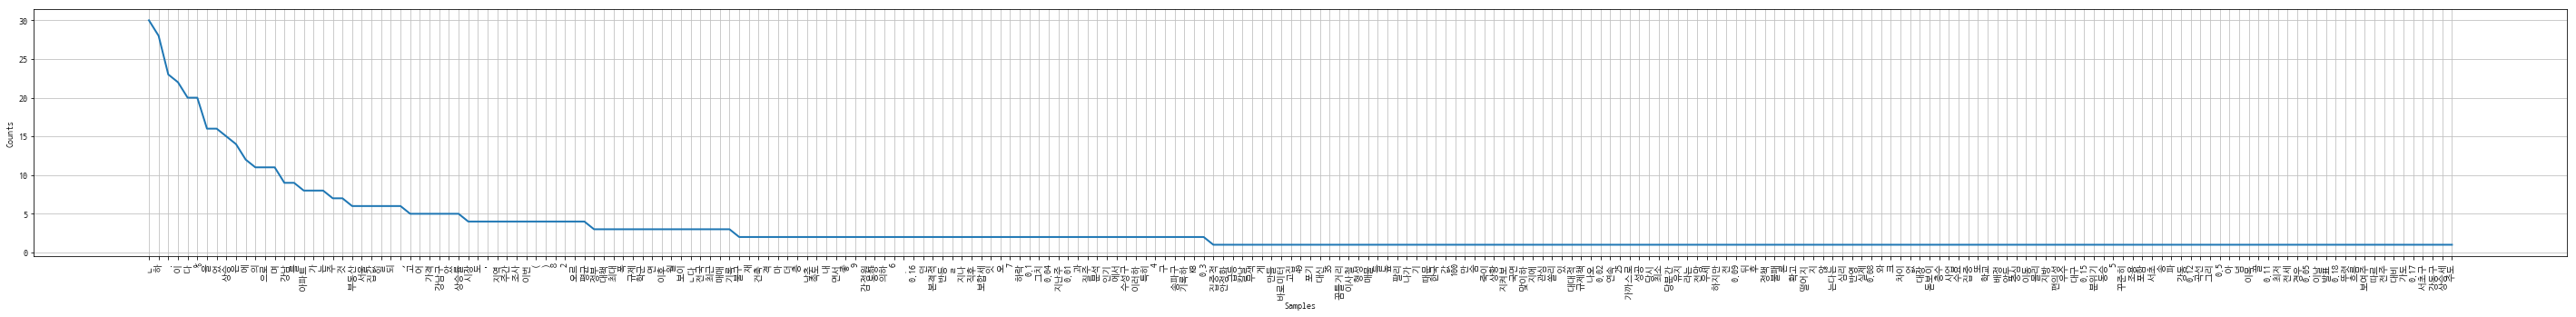

In [67]:
plt.figure(figsize=(50, 5))
ko.plot()

In [64]:
len(full_list)

610

In [65]:
train_docs, test_docs = full_list[:300], full_list[300:]

In [74]:
selected_words = [f[0] for f in ko.vocab().most_common(50)]
def term_exists(doc):
    return {'exists({})'.format(word): (word in set(doc)) for word in selected_words}

#train_xy = [(term_exists(d), c) for d, c in train_docs]
#test_xy = [(term_exists(d), c) for d, c in test_docs]

In [75]:
selected_words

['ㄴ',
 '하',
 '.',
 '이',
 '다',
 '%',
 '을',
 '었',
 '상승',
 '은',
 '에',
 '의',
 '으로',
 '며',
 '강남',
 '를',
 '아파트',
 '가',
 '는',
 '주',
 '것',
 '부동산',
 '서울',
 '집값',
 '일',
 '되',
 ',',
 '고',
 '어',
 '가격',
 '강남구',
 '았',
 '상승률',
 '시장',
 '도',
 "'",
 '지역',
 '주간',
 '조사',
 '이번',
 '(',
 ')',
 '8',
 '2',
 '오르',
 '평균',
 '정부',
 '대책',
 '최대',
 '폭']

In [79]:
aa

'에두아 스페샤 주한 유니세프 대표는 이날 발표에서 "영양실조와 질병으로부터 어린이들을 보호하지 못하면 사회분열, 정치불안, 환경악화에 이를 수 있다"고 경고했다.'

In [77]:
term_exists(tmp)

{'exists(%)': True,
 "exists(')": False,
 'exists(()': True,
 'exists())': True,
 'exists(,)': False,
 'exists(.)': True,
 'exists(2)': True,
 'exists(8)': False,
 'exists(ㄴ)': False,
 'exists(가)': True,
 'exists(가격)': False,
 'exists(강남)': False,
 'exists(강남구)': False,
 'exists(것)': True,
 'exists(고)': True,
 'exists(는)': True,
 'exists(다)': True,
 'exists(대책)': False,
 'exists(도)': True,
 'exists(되)': True,
 'exists(를)': True,
 'exists(며)': True,
 'exists(부동산)': False,
 'exists(상승)': False,
 'exists(상승률)': False,
 'exists(서울)': False,
 'exists(시장)': False,
 'exists(아파트)': False,
 'exists(았)': False,
 'exists(어)': True,
 'exists(었)': False,
 'exists(에)': True,
 'exists(오르)': False,
 'exists(으로)': False,
 'exists(은)': True,
 'exists(을)': True,
 'exists(의)': True,
 'exists(이)': True,
 'exists(이번)': False,
 'exists(일)': True,
 'exists(정부)': False,
 'exists(조사)': False,
 'exists(주)': True,
 'exists(주간)': False,
 'exists(지역)': False,
 'exists(집값)': False,
 'exists(최대)': False,
 'exists(평균)

#### Classification

In [ ]:
classifier = nltk.NaiveBayesClassifier.train(train_xy)
print(nltk.classify.accuracy(classifier, test_xy))

classifier.show_most_informative_features(10)

### Word2Vec

### Doc2Vec

In [ ]:
from collections import namedtuple
TaggedDocument = namedtuple('TaggedDocument', 'words tags')

tagged_train_docs = [TaggedDocument(d, [c]) for d, c in train_docs]
tagged_test_docs = [TaggedDocument(d, [c]) for d, c in test_docs]

In [ ]:
from gensim.models import doc2vec
# 사전 구축
doc_vectorizer = doc2vec.Doc2Vec(size=300, alpha=0.025, min_alpha=0.025, seed=1234)
doc_vectorizer.build_vocab(tagged_train_docs)
# Train document vectors!
for epoch in range(10):
    doc_vectorizer.train(tagged_train_docs)
    doc_vectorizer.alpha -= 0.002  # decrease the learning rate
    doc_vectorizer.min_alpha = doc_vectorizer.alpha  # fix the learning rate, no decay
# To save
# doc_vectorizer.save('doc2vec.model')

In [ ]:
pprint(doc_vectorizer.most_similar('공포/Noun'))

Done.